# Crop Production In India

This notebook aims to predict the production rate of crops in the different states of India. 

> The dataset used for this analysis can be downloaded from Kaggle https://www.kaggle.com/datasets/nikhilmahajan29/crop-production-statistics-india

* The objective of this analysis is to develop a predictive model that can forecast the production rate of crops in different Indian states. Additionally, the aim is to identify the key factors that contribute to higher crop production and suggest solutions for better production.

* The analysis involves using various statistical and machine learning techniques to preprocess the data, extract relevant features, and train a predictive model. This model will then be used to predict crop production for different states in India based on their agricultural characteristics and other factors that influence crop growth and production.

* The goal of this analysis is not only to predict crop production rates but also to identify key factors that contribute to better production. This information can be used to develop strategies for improving agricultural practices in different states, such as using better seeds, improving irrigation methods, or adopting more sustainable farming practices.


## Getting Dataset

You can download dataset from https://www.kaggle.com/datasets/nikhilmahajan29/crop-production-statistics-india or you can use a dataset from the `data` directory

## Importing required modules

In [1]:
import pandas as pd                                     # Importing pandas to read dataset from files (Here I used csv file)
import numpy as np                                      # To use list as array
from sklearn.model_selection import train_test_split    # To Split Data into Train and Test data (For experiments to calculate scores)
from sklearn.preprocessing import LabelEncoder          # Can Be used to encode the categorical values to computer understandable numbers
import seaborn as sns                                   # Build on matplotlib to plot graphs in modern look
import matplotlib.pyplot as plt                         # Plotting library
import prettytable                                      # Used to display dictionary in table form
from sklearn.preprocessing import MinMaxScaler          # Used for scaling values
from sklearn.linear_model import LinearRegression       # Perform Linear Regressor for future prediction of production

Ignoring unwanted warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

## The Dataset

Let's read the data using pandas dataframe

In [3]:
df = pd.read_csv("data/APY.csv")
df.head()

State District       Crop  Crop_Year       Season  \
0  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Kharif        
1  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Rabi          
2  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Autumn        
3  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Summer        
4  Andaman and Nicobar Island  NICOBARS  Arecanut       2009  Autumn        

    Area   Production  Yield  
0  2439.6      3415.0   1.40  
1  1626.4      2277.0   1.40  
2  4147.0      3060.0   0.74  
3  4147.0      2660.0   0.64  
4  4153.0      3120.0   0.75

In [4]:
len(df)

345336

From above output, we can confirm that we have 345336 rows in our dataframe

## Cleaning Dataset

This is most important and must need to do before training/exploring our data

In [5]:
df.isna().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

From above output, We can see `Production` column has 4948 nan values. Let's fix this.

In [6]:
df.keys()

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

By viewing column names, we see some column name contains white spaces on the right side. It is not necessary for remove that white spaces. For me, it just irritating, so I removed that white spaced using strip()

In [7]:
df.columns = df.columns.str.strip()

While Trying to view data, I found some row of District contains "\n", so just replace it with ""

In [8]:
df["District"] = df["District"].str.replace("\n", "")

The algorithm to fill the nan values in the `Production` is simple, Just find the mean value of `Production` for unique Districts and replace the nan values of every districts with district's production mean value

In [9]:
for district in df["District"].unique():
  df["Production"][df["District"] == district] = df["Production"][df["District"] == district].fillna(np.mean(df["Production"][df["District"] == district]))


In [10]:
df.isna().sum()

State         0
District      0
Crop          9
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

From above output, we confirm that the data is clean now wihout nan values

We don't need yield, cuz we are not going to predict Yield in areas. So, we just drop it

In [11]:
df.drop("Yield", axis=1, inplace=True)

## Exploring dataset

I'd like to explore the data for,

* Best district for production in a state
* Best crop for production in a state
* Best crop is produced in a season


**Best district for production in a state** 

So Let's start..

In [12]:
df["State"].unique()

array(['Andaman and Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'THE DADRA AND NAGAR HAVELI',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

> To find the best District for production in the State

In [13]:
best_dist_prod_in_state = {}

for s in range(0, len(df["State"].unique())):
  first_dist = df["District"][df["State"] == df["State"].unique()[s]].values[0]
  best_production = np.sum(df["Production"][df["District"] == first_dist])
  best_dist = first_dist
  for dist in df["District"][df["State"] == df["State"].unique()[s]].unique():
    production = np.sum(df["Production"][df["District"] == dist])
    if production > best_production:
      best_production = production
      best_dist = dist
    else:
      pass
  best_dist_prod_in_state[df["State"].unique()[s]] = best_dist

In [14]:
table = prettytable.PrettyTable()
table.field_names = ["State", "Best District in production"]
for state, district in best_dist_prod_in_state.items():
    table.add_row([state, district])
table

+----------------------------+-----------------------------+
|           State            | Best District in production |
+----------------------------+-----------------------------+
| Andaman and Nicobar Island |           NICOBARS          |
|       Andhra Pradesh       |        EAST GODAVARI        |
|     Arunachal Pradesh      |          EAST SIANG         |
|           Assam            |            NAGAON           |
|           Bihar            |      PASHCHIM CHAMPARAN     |
|         CHANDIGARH         |          CHANDIGARH         |
|        Chhattisgarh        |          BALRAMPUR          |
|   Dadra and Nagar Haveli   |    DADRA AND NAGAR HAVELI   |
|       Daman and Diu        |            DAMAN            |
|           Delhi            |         DELHI_TOTAL         |
|            Goa             |          NORTH GOA          |
|          Gujarat           |            SURAT            |
|          Haryana           |         YAMUNANAGAR         |
|      Himachal Pradesh      |           HAMIRPUR          |
|     Jammu and Kashmir      |            JAMMU            |
|         Jharkhand          |            RANCHI           |
|         Karnataka          |           TUMAKURU          |
|           Kerala           |          KOZHIKODE          |
|           Laddak           |          LEH LADAKH         |
|       Madhya Pradesh       |         NARSINGHPUR         |
|        Maharashtra         |           KOLHAPUR          |
|          Manipur           |           THOUBAL           |
|         Meghalaya          |       WEST GARO HILLS       |
|          Mizoram           |            AIZAWL           |
|          Nagaland          |           DIMAPUR           |
|           Odisha           |           BARGARH           |
|         Puducherry         |         PONDICHERRY         |
|           Punjab           |           SANGRUR           |
|         Rajasthan          |          GANGANAGAR         |
|           Sikkim           |        SOUTH DISTRICT       |
|         Tamil Nadu         |          COIMBATORE         |
|         Telangana          |           KHAMMAM           |
| THE DADRA AND NAGAR HAVELI |    DADRA AND NAGAR HAVELI   |
|          Tripura           |        SOUTH TRIPURA        |
|       Uttar Pradesh        |            KHERI            |
|        Uttarakhand         |           HARIDWAR          |
|        West Bengal         |       PARAGANAS SOUTH       |
+----------------------------+-----------------------------+

In [15]:
def production_in_state():
  for state in df["State"].unique():
    state_data = df[df["State"] == state]
    sns.barplot(x="District", y="Production", data=state_data)
    plt.title("Crop production in " + str(state))
    plt.xlabel("Districts")
    plt.ylabel("Production")

    plt.xticks(rotation=90)
    plt.show()



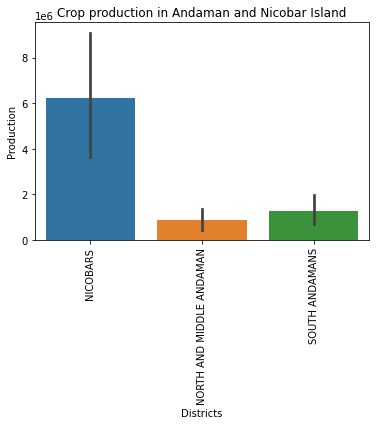

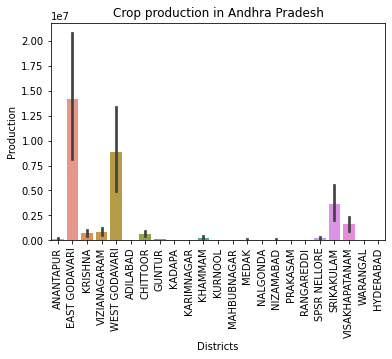

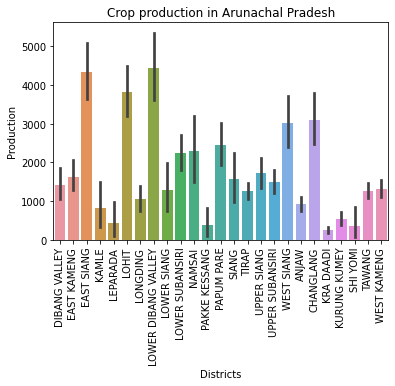

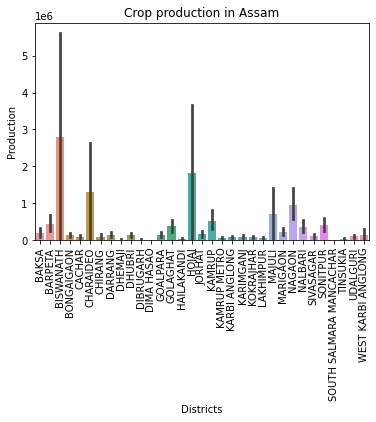

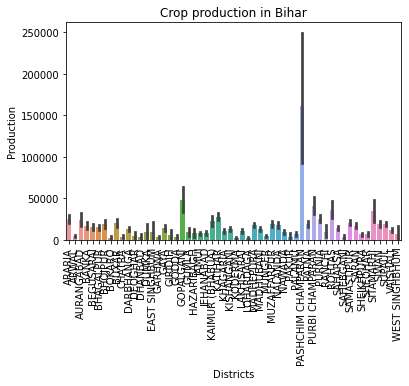

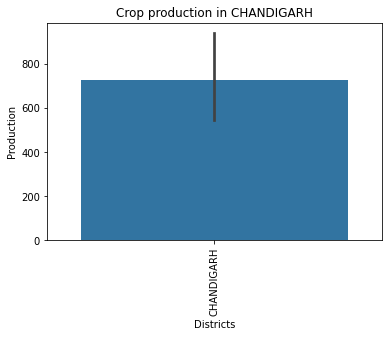

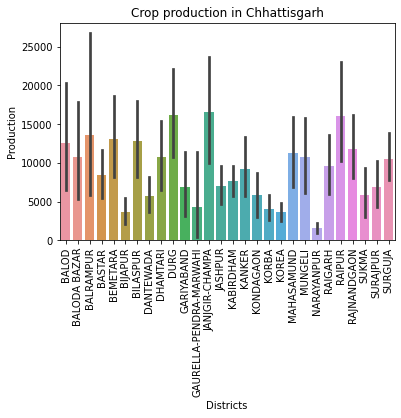

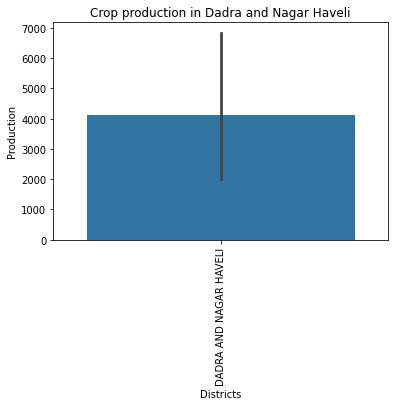

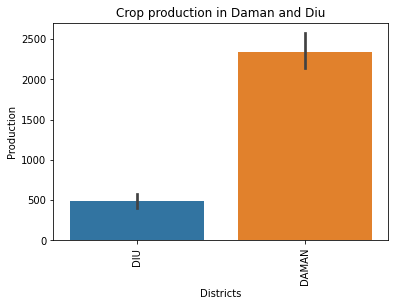

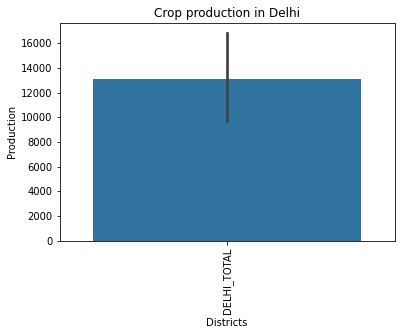

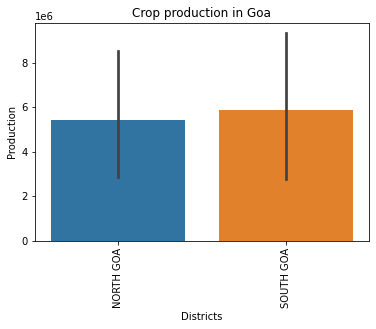

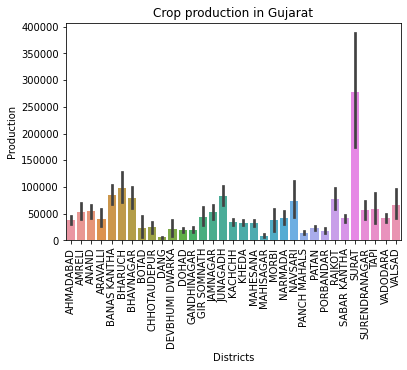

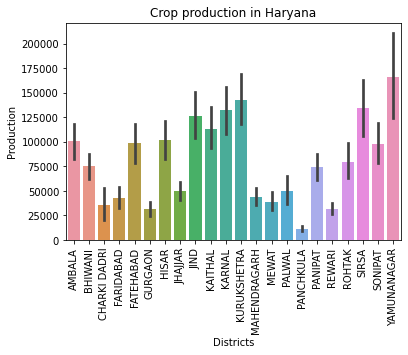

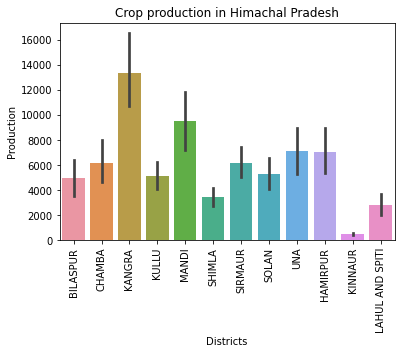

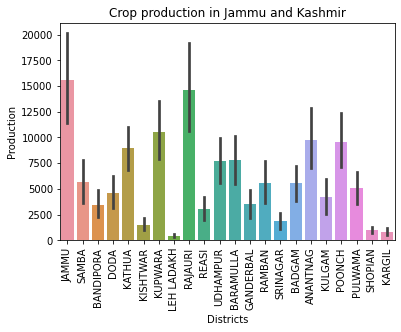

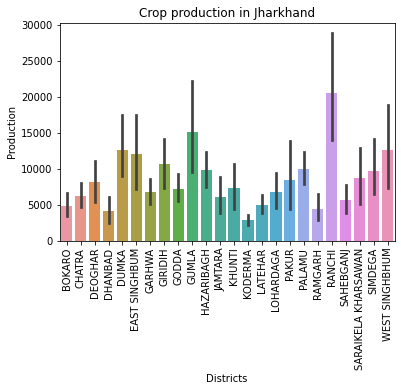

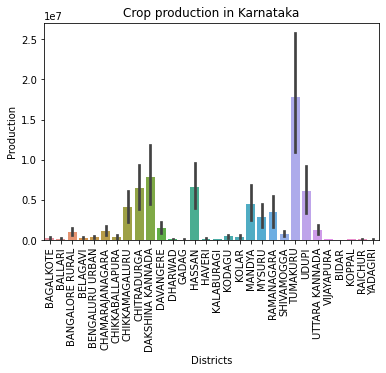

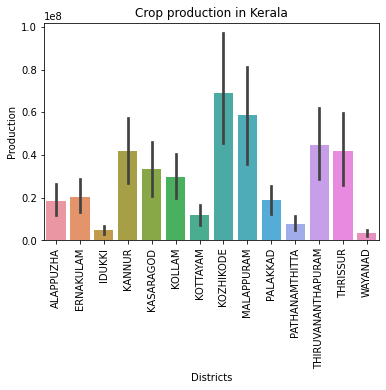

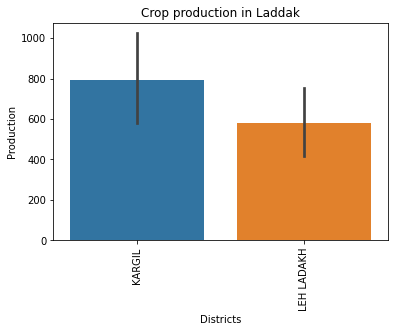

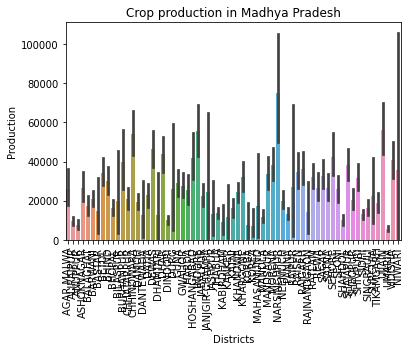

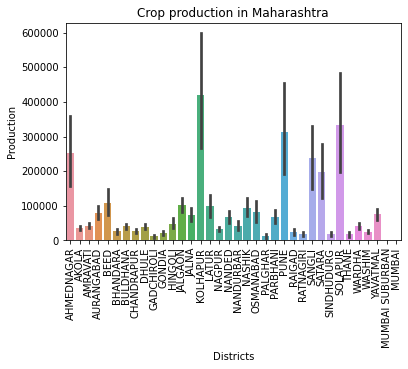

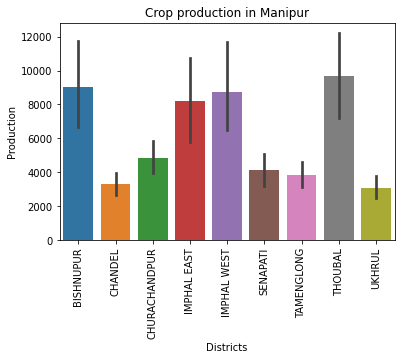

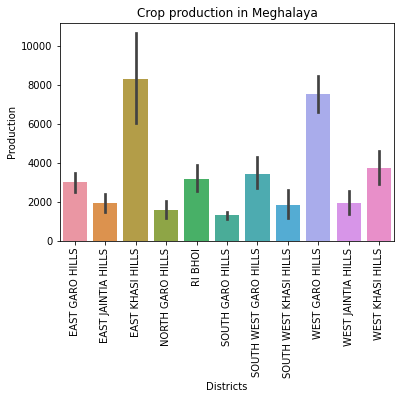

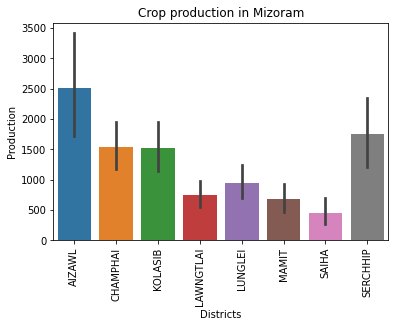

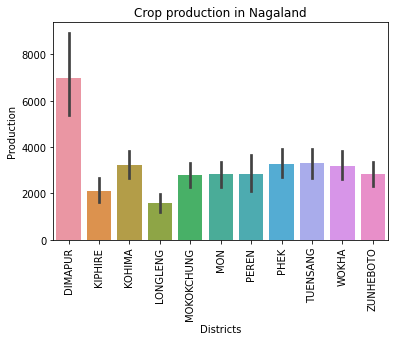

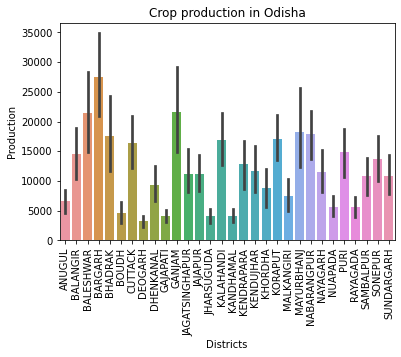

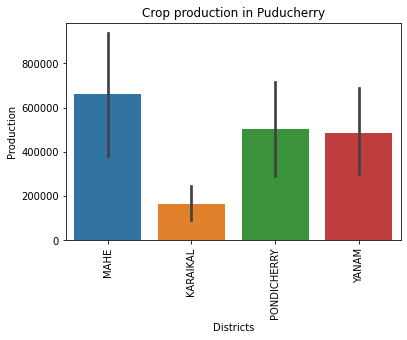

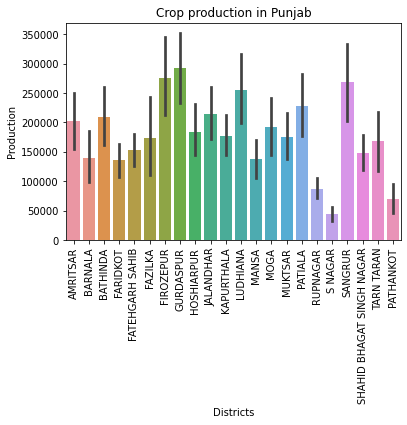

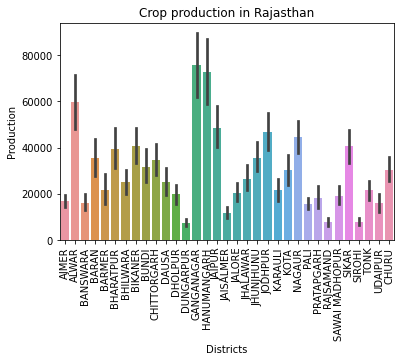

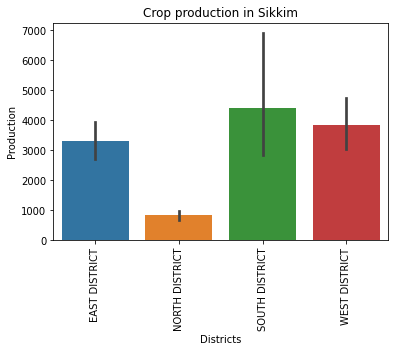

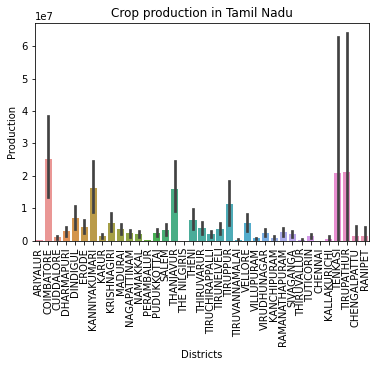

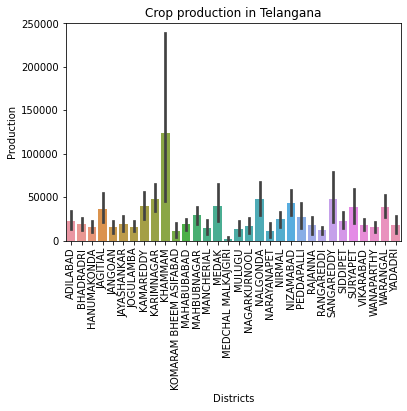

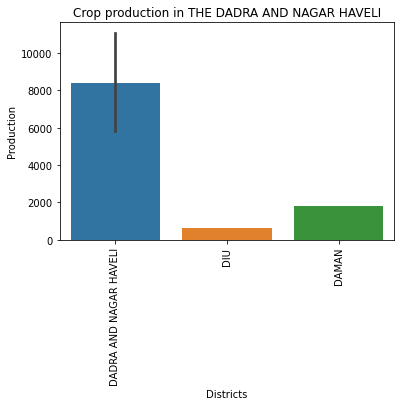

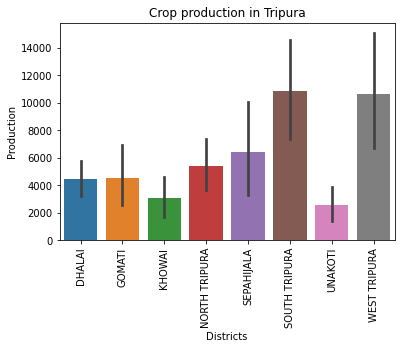

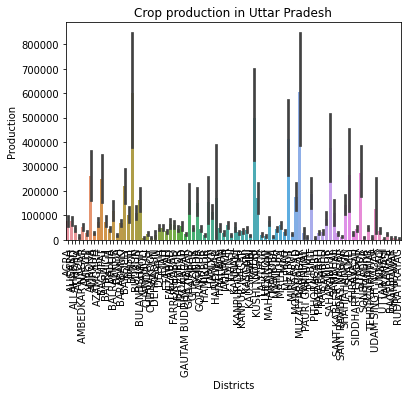

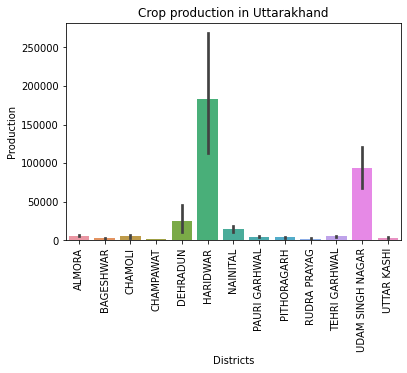

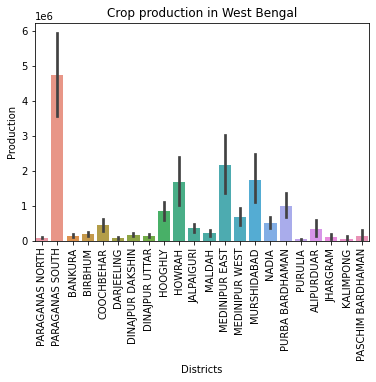

In [16]:
production_in_state()

**Best crop for production in a state**

In [17]:
best_crop_prod_in_state = {}

for s in range(0, len(df["State"].unique())):
  first_crop = df["Crop"][df["State"] == df["State"].unique()[s]].values[0]
  best_production = np.sum(df["Production"][df["Crop"] == first_crop][df["State"] == df["State"].unique()[s]])
  best_crop = first_crop
  for crop in df["Crop"][df["State"] == df["State"].unique()[s]].unique():
    production = np.sum(df["Production"][df["Crop"] == crop][df["State"] == df["State"].unique()[s]])
    if production > best_production:
      best_production = production
      best_crop = crop
    else:
      pass
  best_crop_prod_in_state[df["State"].unique()[s]] = best_crop

In [18]:
table = prettytable.PrettyTable()
table.field_names = ["State", "Best Crop production"]
for state, district in best_crop_prod_in_state.items():
    table.add_row([state, district])
table

+----------------------------+----------------------+
|           State            | Best Crop production |
+----------------------------+----------------------+
| Andaman and Nicobar Island |       Coconut        |
|       Andhra Pradesh       |       Coconut        |
|     Arunachal Pradesh      |         Rice         |
|           Assam            |       Coconut        |
|           Bihar            |      Sugarcane       |
|         CHANDIGARH         |        Wheat         |
|        Chhattisgarh        |         Rice         |
|   Dadra and Nagar Haveli   |         Rice         |
|       Daman and Diu        |         Rice         |
|           Delhi            |        Wheat         |
|            Goa             |       Coconut        |
|          Gujarat           |      Sugarcane       |
|          Haryana           |        Wheat         |
|      Himachal Pradesh      |        Maize         |
|     Jammu and Kashmir      |        Maize         |
|         Jharkhand          |         Rice         |
|         Karnataka          |       Coconut        |
|           Kerala           |       Coconut        |
|           Laddak           |        Wheat         |
|       Madhya Pradesh       |        Wheat         |
|        Maharashtra         |      Sugarcane       |
|          Manipur           |         Rice         |
|         Meghalaya          |         Rice         |
|          Mizoram           |         Rice         |
|          Nagaland          |         Rice         |
|           Odisha           |         Rice         |
|         Puducherry         |       Coconut        |
|           Punjab           |        Wheat         |
|         Rajasthan          |        Wheat         |
|           Sikkim           |        Maize         |
|         Tamil Nadu         |       Coconut        |
|         Telangana          |         Rice         |
| THE DADRA AND NAGAR HAVELI |      Sugarcane       |
|          Tripura           |         Rice         |
|       Uttar Pradesh        |      Sugarcane       |
|        Uttarakhand         |      Sugarcane       |
|        West Bengal         |       Coconut        |
+----------------------------+----------------------+

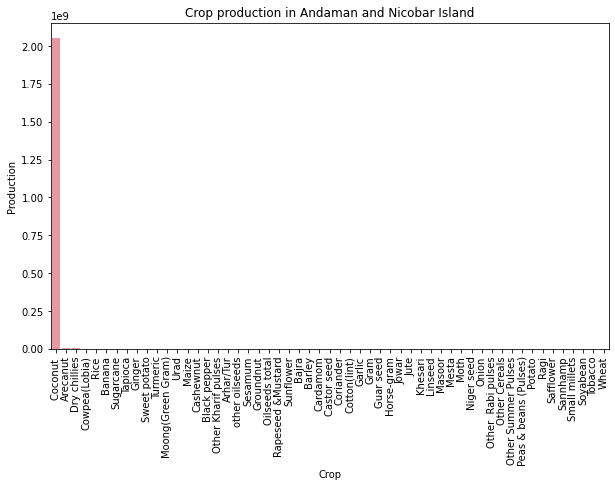

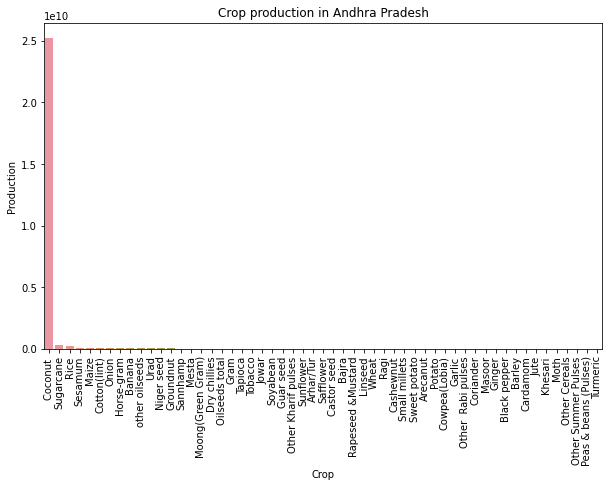

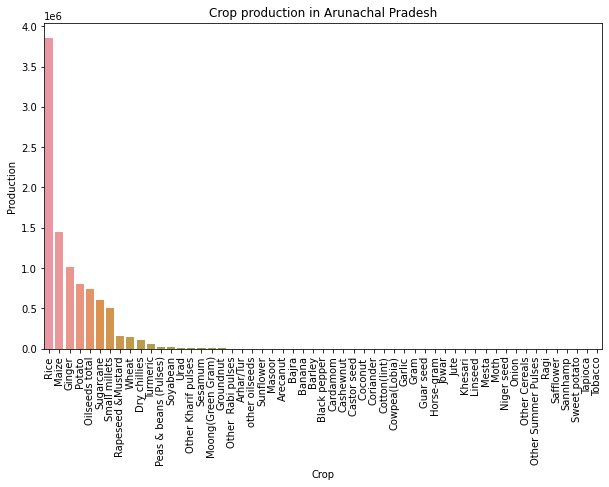

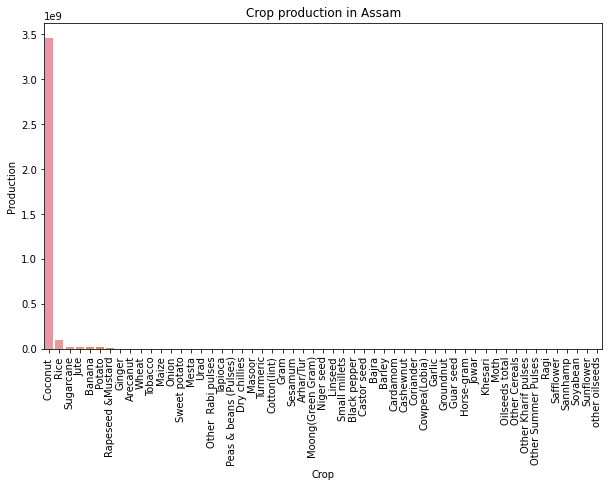

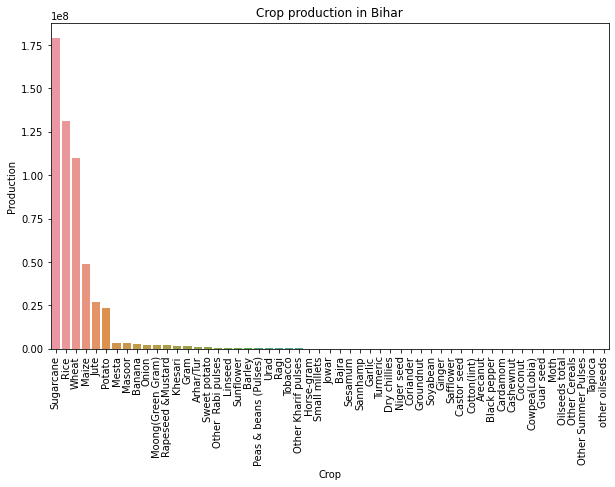

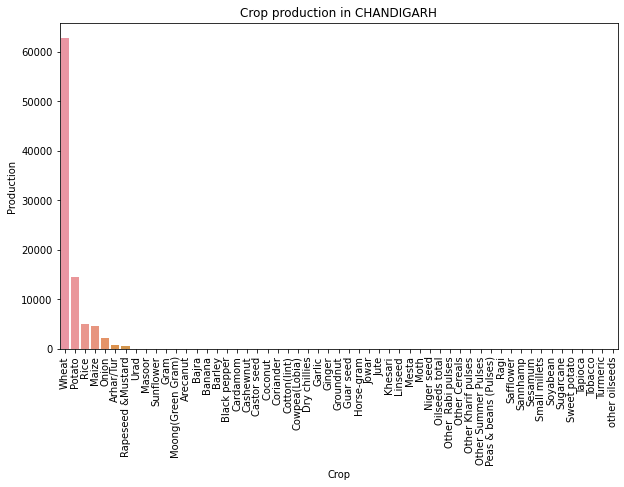

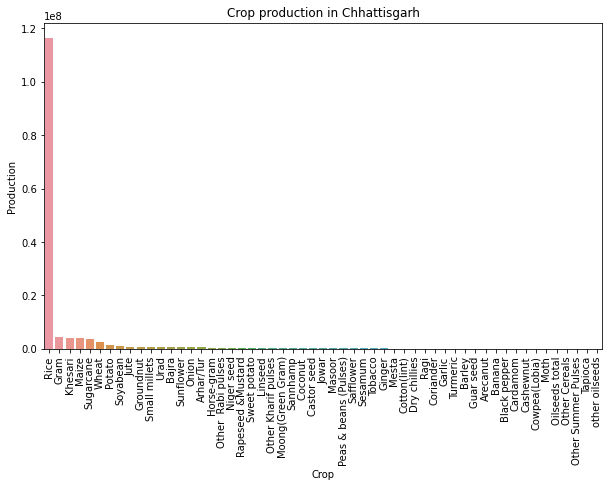

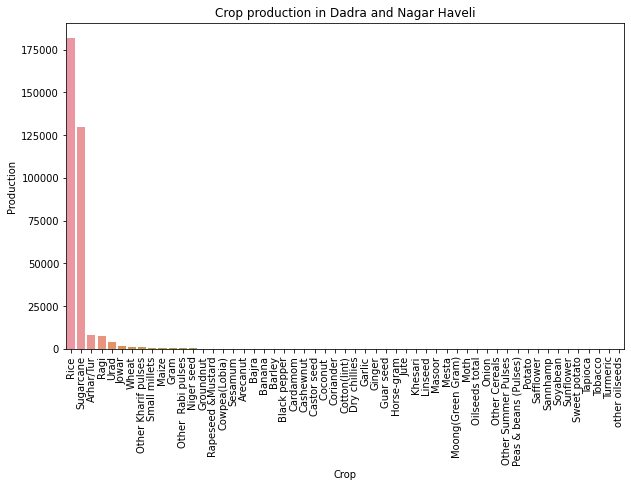

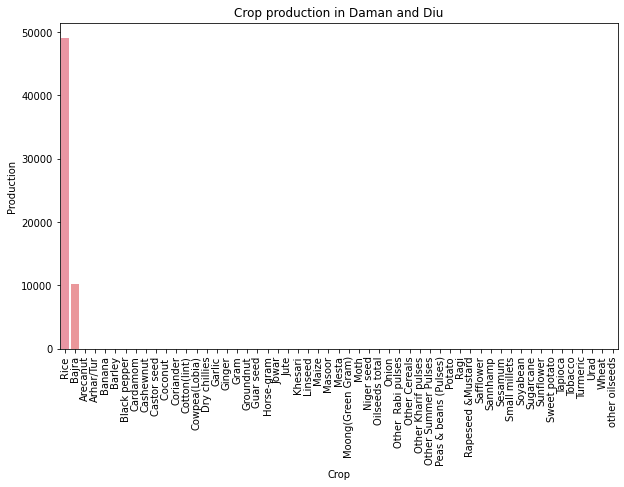

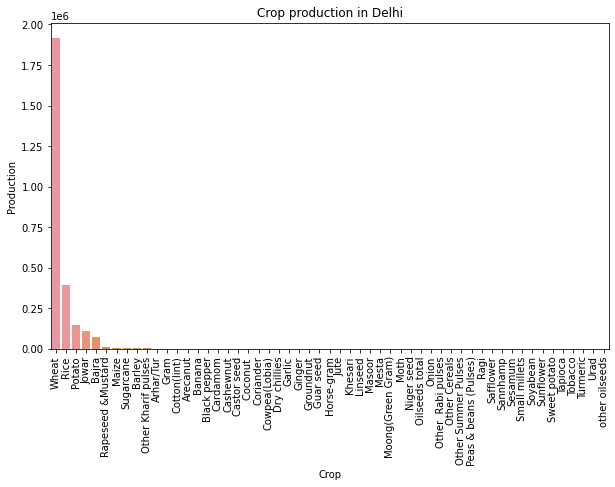

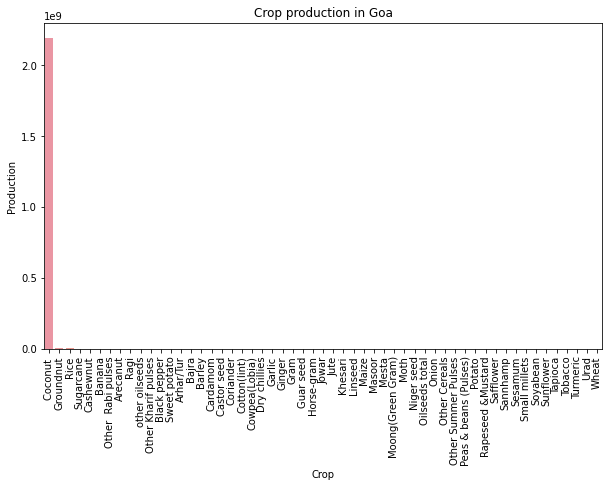

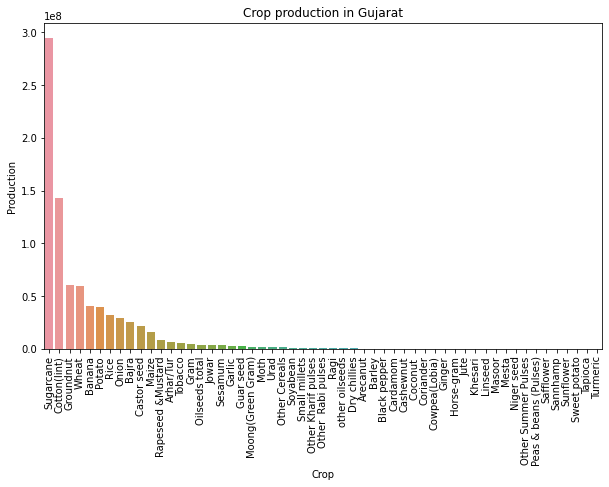

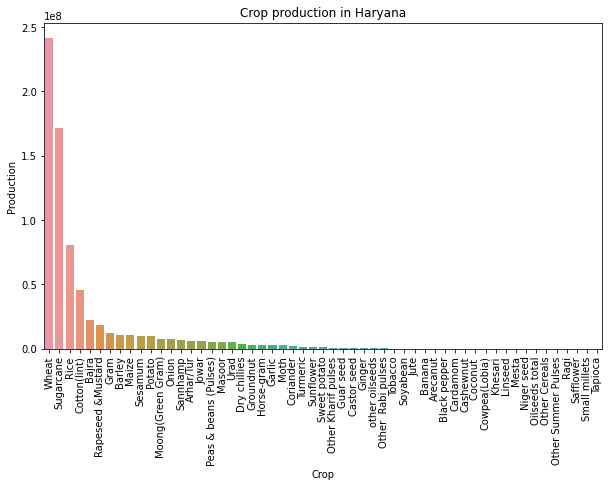

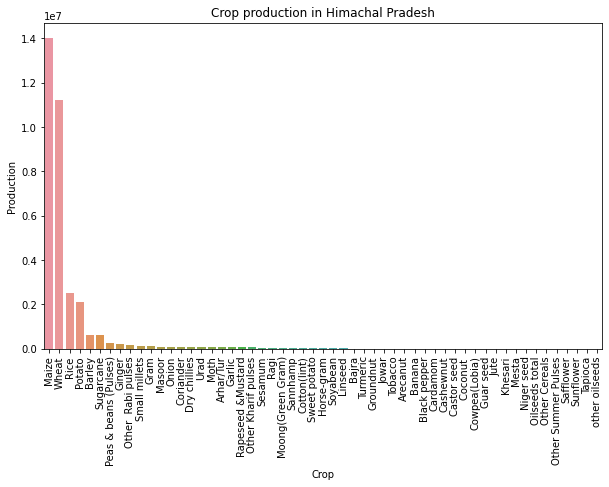

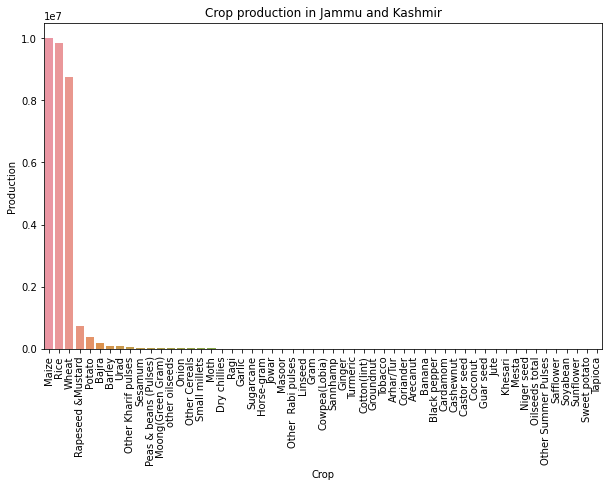

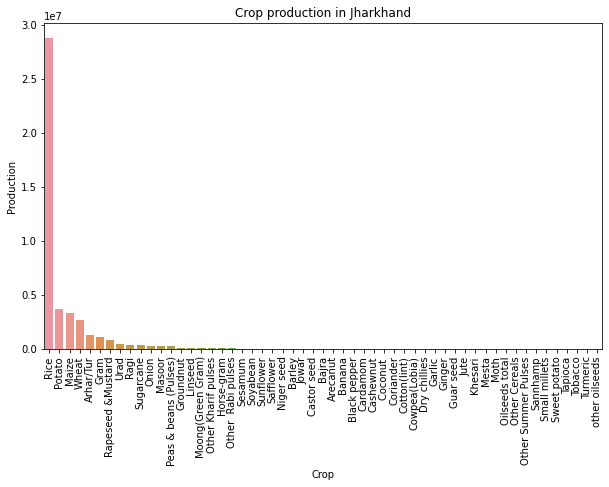

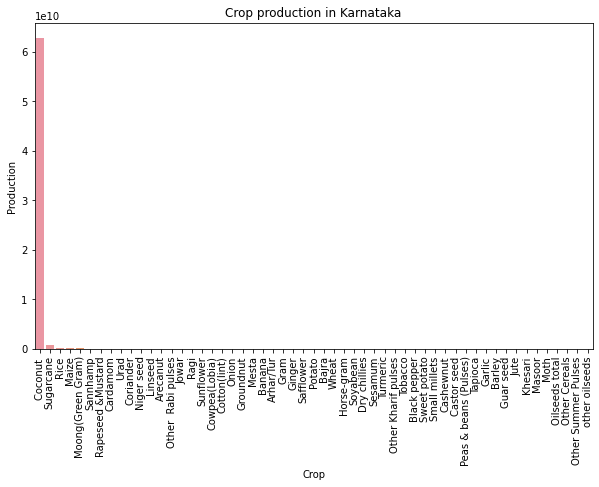

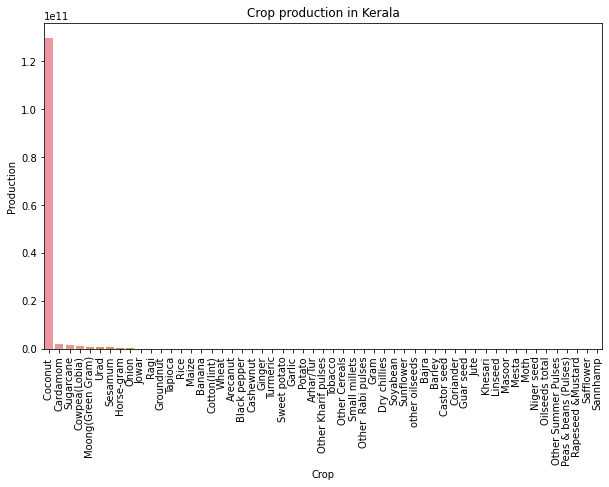

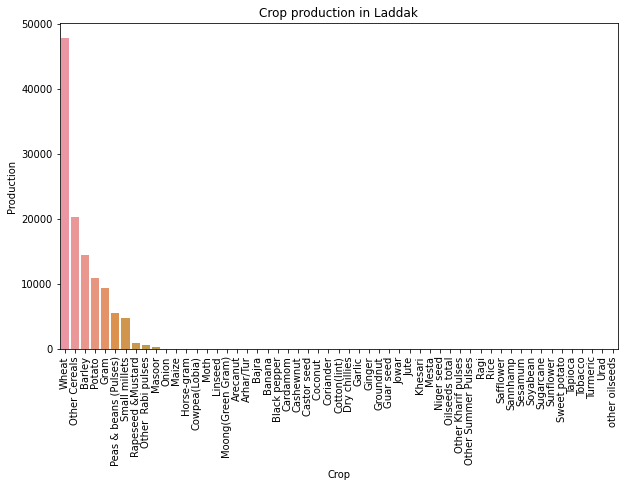

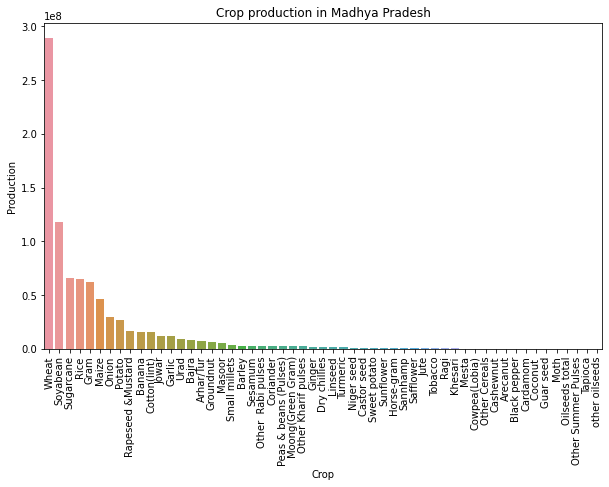

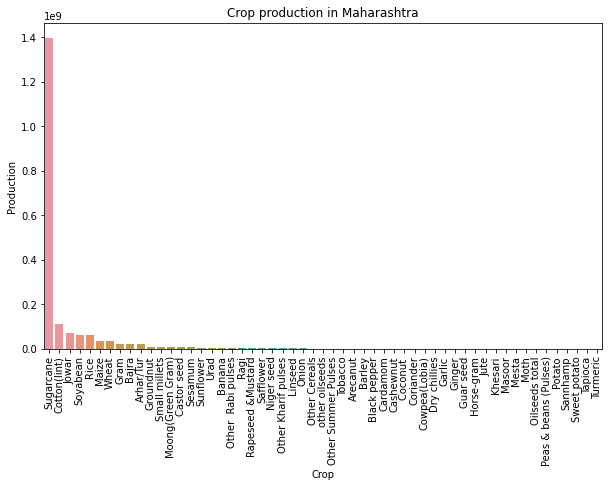

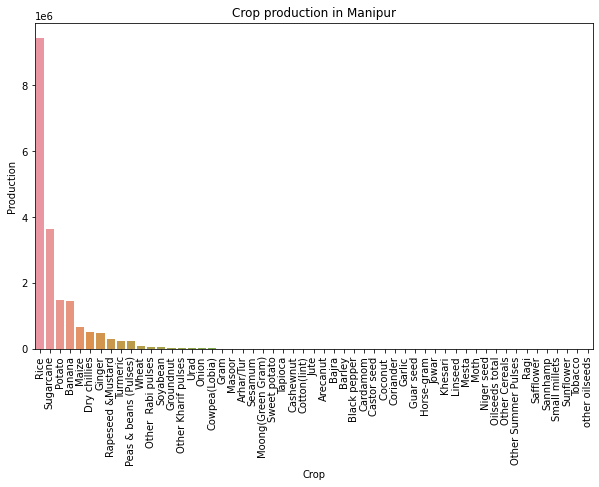

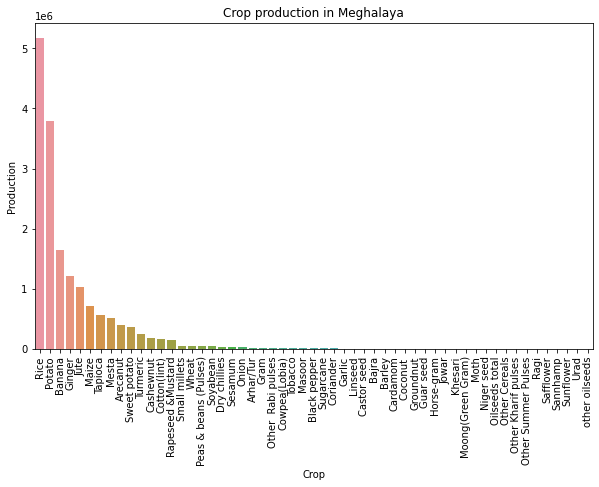

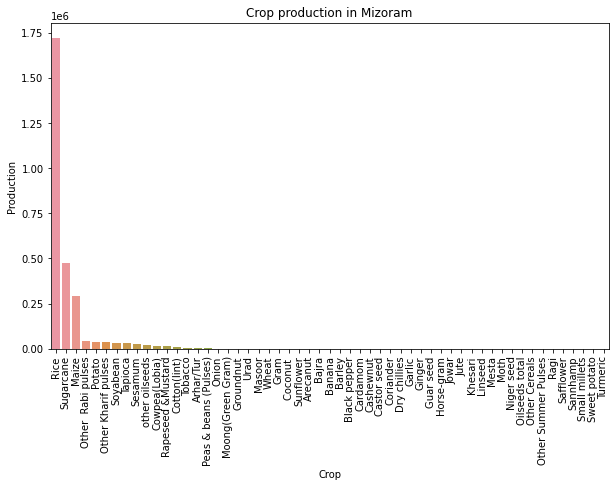

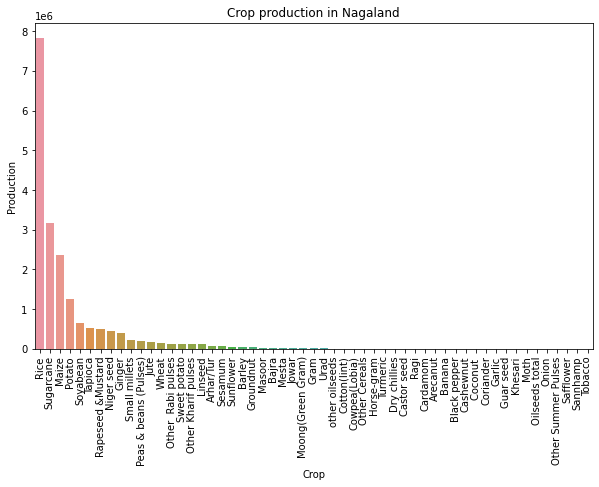

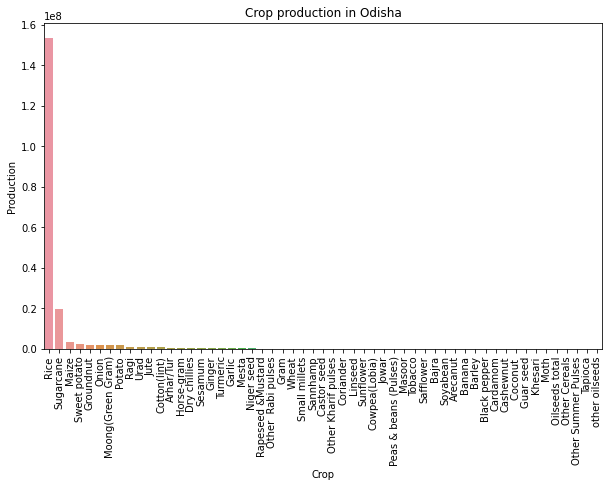

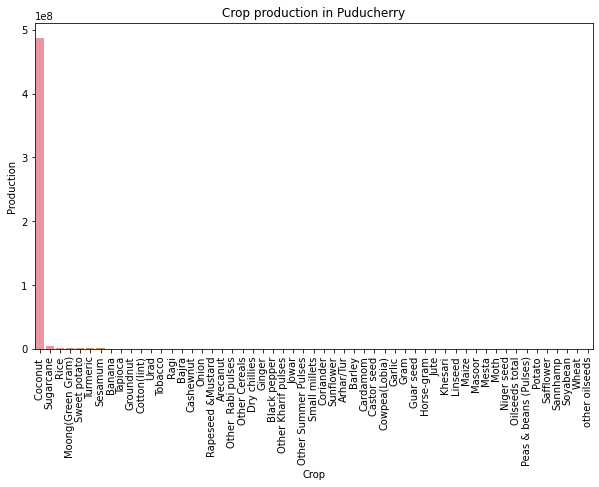

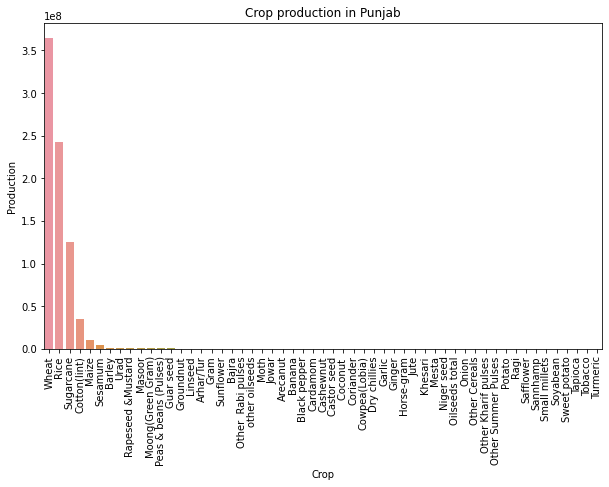

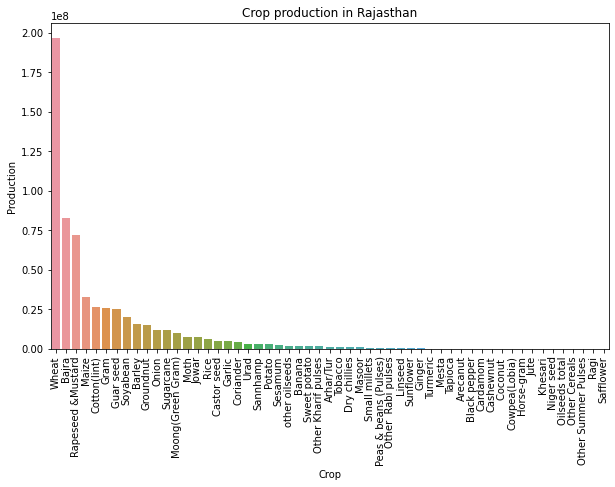

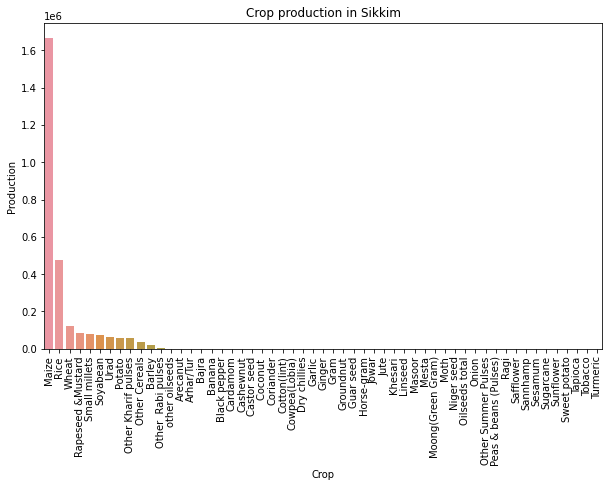

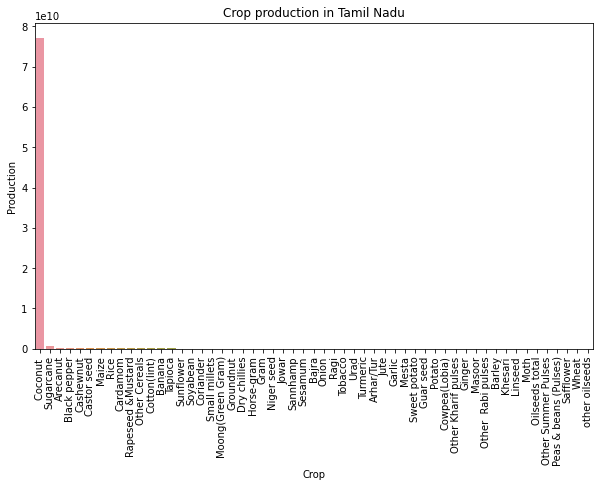

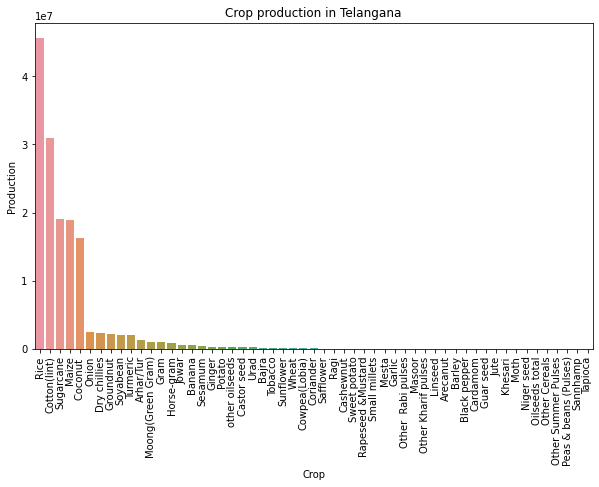

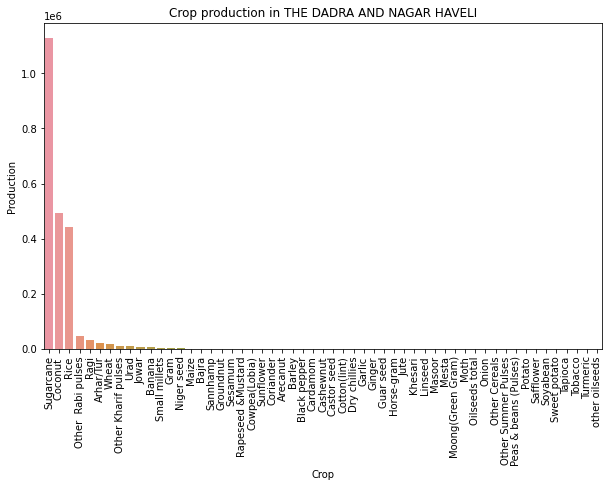

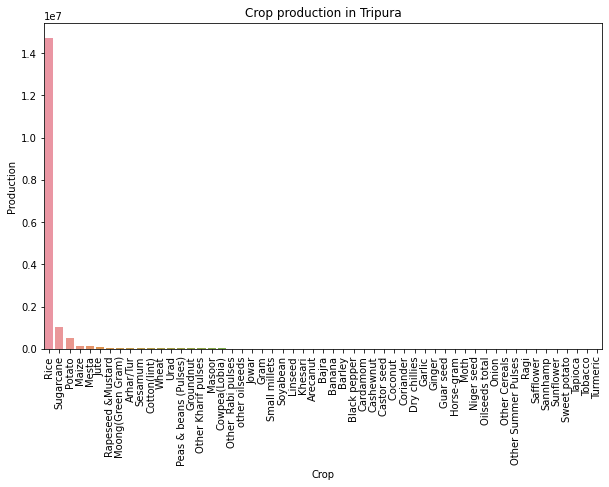

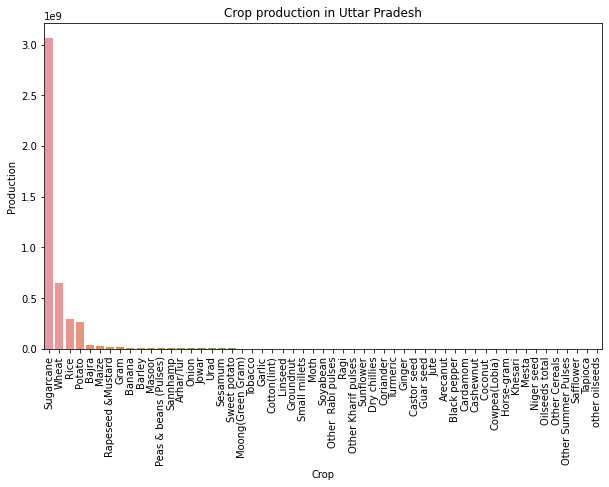

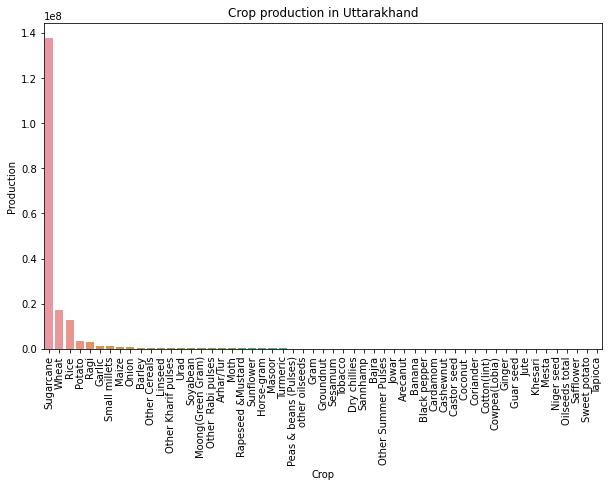

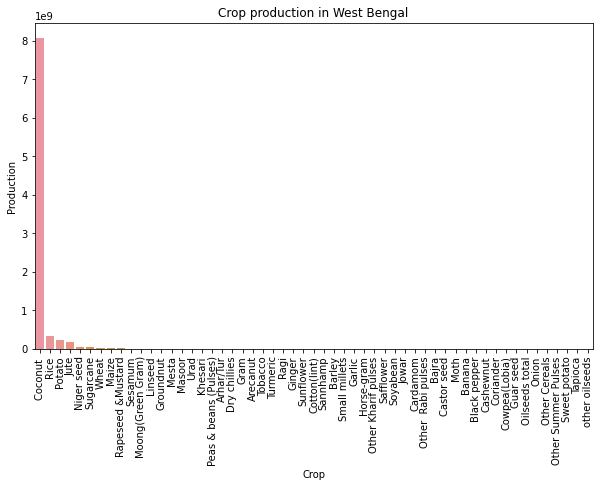

In [19]:
pivot_table = df.pivot_table(values='Production', index='State', columns='Crop', aggfunc='sum')
for state in df['State'].unique():
    plt.figure(figsize=(10, 6))
    state_data = pivot_table.loc[state].sort_values(ascending=False)
    sns.barplot(x=state_data.index, y=state_data.values)
    plt.title(f'Crop production in {state}')
    plt.xlabel('Crop')
    plt.ylabel('Production')
    plt.xticks(rotation=90)
    plt.show()

**Best crop is produced in a season**

In [20]:
df["Season"] = df["Season"].str.strip()
df["Season"].unique()

array(['Kharif', 'Rabi', 'Autumn', 'Summer', 'Whole Year', 'Winter'],
      dtype=object)

In [21]:
best_dist_prod_in_season = {}

for s in range(0, len(df["State"].unique())):
  first_dist = df["District"][df["State"] == df["State"].unique()[s]].values[0]
  best_production = np.sum(df["Production"][df["District"] == first_dist])
  best_dist = first_dist
  for dist in df["District"][df["State"] == df["State"].unique()[s]].unique():
    production = np.sum(df["Production"][df["District"] == dist])
    if production > best_production:
      best_production = production
      best_dist = dist
    else:
      pass
  best_dist_prod_in_state[df["State"].unique()[s]] = best_dist

In [22]:
best_crop_prod_in_season = {}

for s in range(0, len(df["Season"].unique())):
  first_crop = df["Crop"][df["Season"] == df["Season"].unique()[s]].values[0]
  best_production = np.sum(df["Production"][df["Crop"] == first_crop][df["Season"] == df["Season"].unique()[s]])
  best_crop = first_crop
  for crop in df["Crop"][df["Season"] == df["Season"].unique()[s]].unique():
    production = np.sum(df["Production"][df["Crop"] == crop][df["Season"] == df["Season"].unique()[s]])
    if production > best_production:
      best_production = production
      best_crop = crop
    else:
      pass
  best_crop_prod_in_season[df["Season"].unique()[s]] = best_crop

In [23]:
best_crop_prod_in_season

{'Kharif': 'Sugarcane',
 'Rabi': 'Wheat',
 'Autumn': 'Rice',
 'Summer': 'Rice',
 'Whole Year': 'Coconut ',
 'Winter': 'Rice'}

In [24]:
table = prettytable.PrettyTable()
table.field_names = ["Season", "Best Crop production"]
for state, district in best_crop_prod_in_season.items():
    table.add_row([state, district])
table

+------------+----------------------+
|   Season   | Best Crop production |
+------------+----------------------+
|   Kharif   |      Sugarcane       |
|    Rabi    |        Wheat         |
|   Autumn   |         Rice         |
|   Summer   |         Rice         |
| Whole Year |       Coconut        |
|   Winter   |         Rice         |
+------------+----------------------+

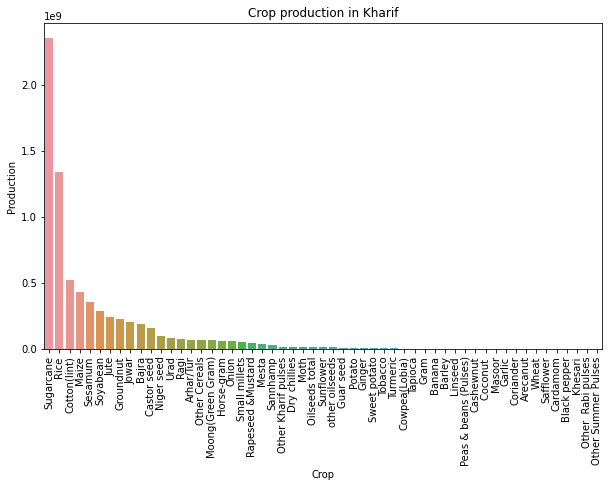

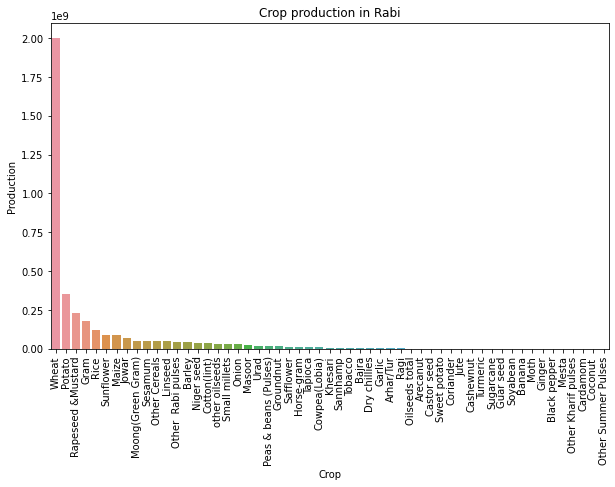

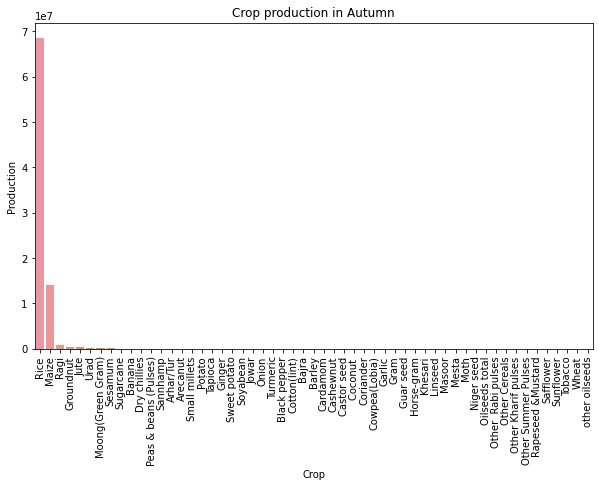

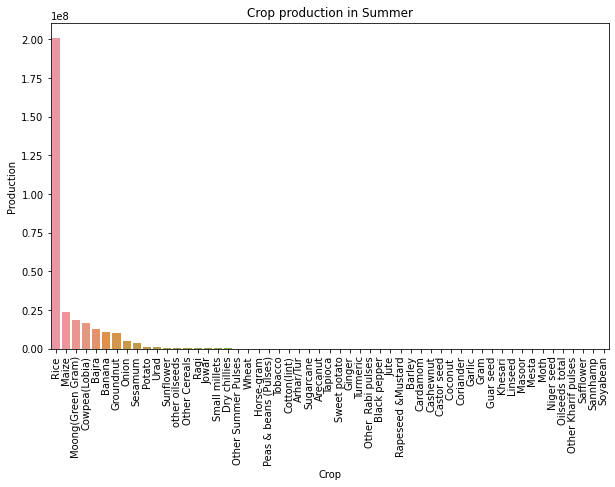

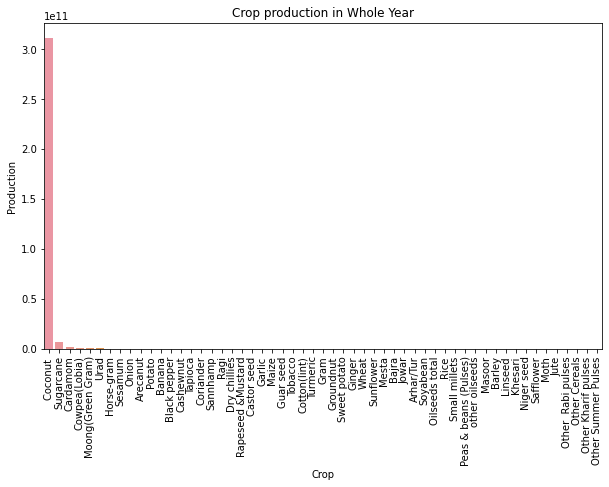

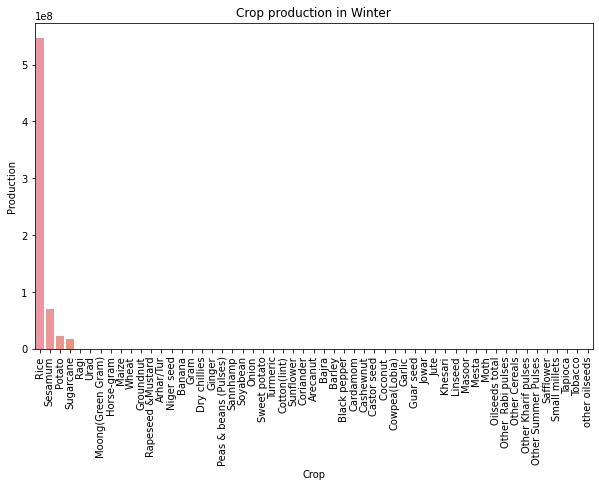

In [25]:
pivot_table = df.pivot_table(values='Production', index='Season', columns='Crop', aggfunc='sum')
for season in df['Season'].unique():
    plt.figure(figsize=(10, 6))
    season_data = pivot_table.loc[season].sort_values(ascending=False)
    sns.barplot(x=season_data.index, y=season_data.values)
    plt.title(f'Crop production in {season}')
    plt.xlabel('Crop')
    plt.ylabel('Production')
    plt.xticks(rotation=90)
    plt.show()

## Making Feature Production Feature (Linear Regressor)

In [26]:
df.head()

State  District      Crop  Crop_Year  Season    Area  \
0  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Kharif  2439.6   
1  Andaman and Nicobar Island  NICOBARS  Arecanut       2007    Rabi  1626.4   
2  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Autumn  4147.0   
3  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Summer  4147.0   
4  Andaman and Nicobar Island  NICOBARS  Arecanut       2009  Autumn  4153.0   

   Production  
0      3415.0  
1      2277.0  
2      3060.0  
3      2660.0  
4      3120.0

Pre-Processing data for future prediction

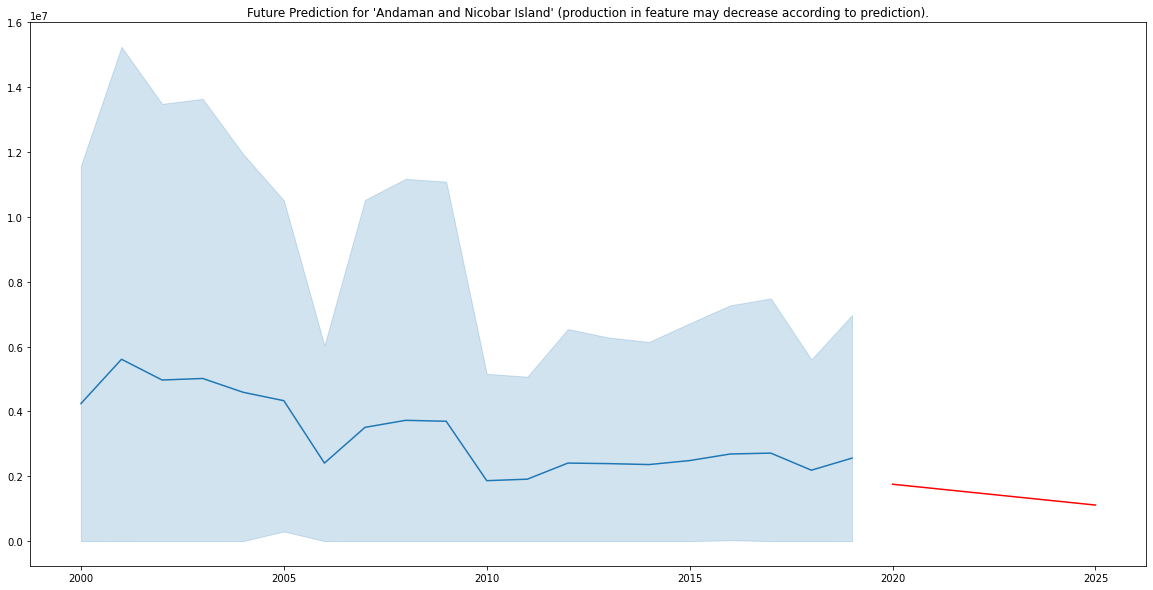

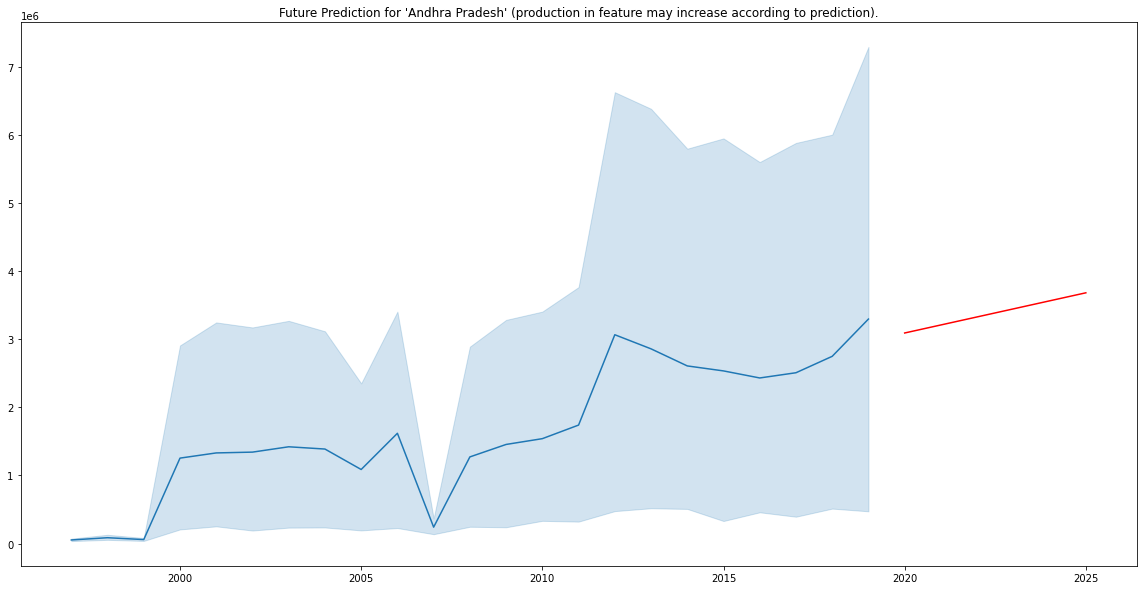

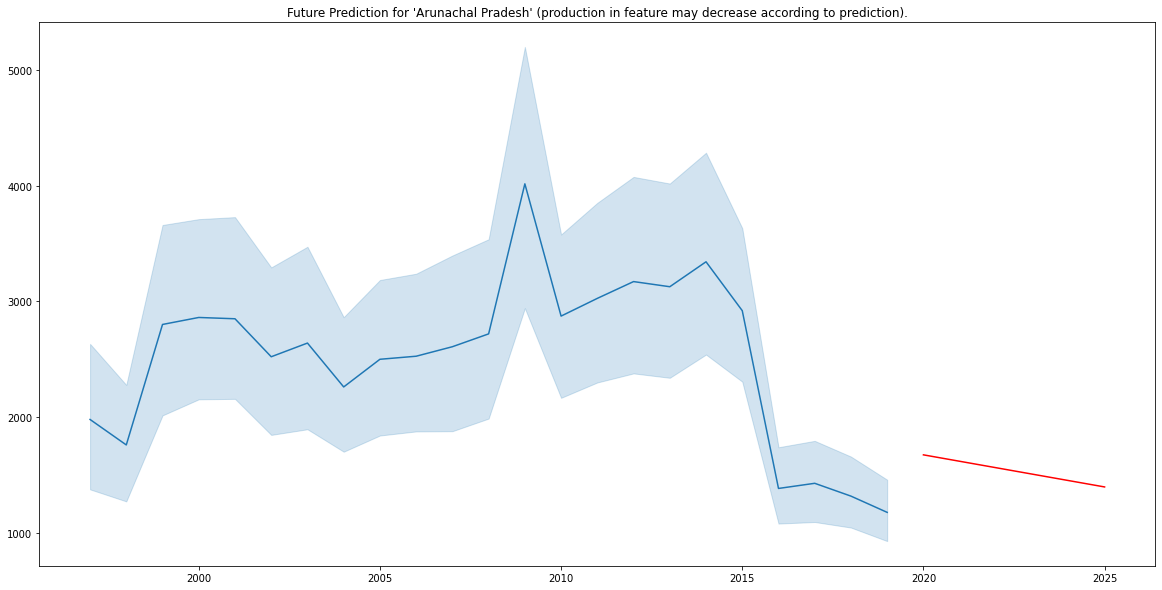

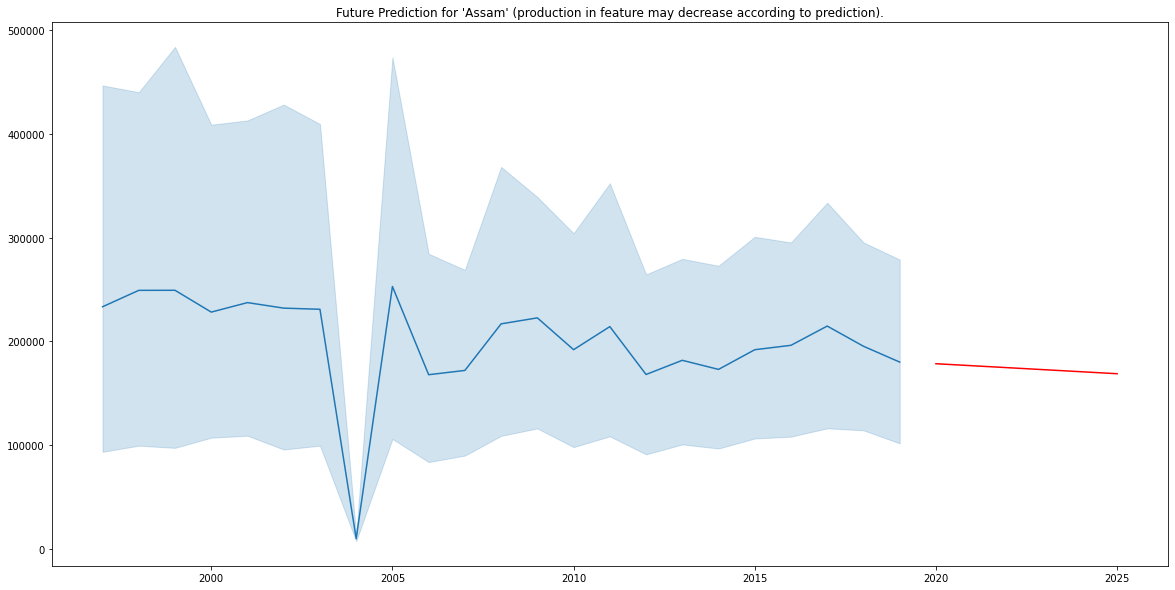

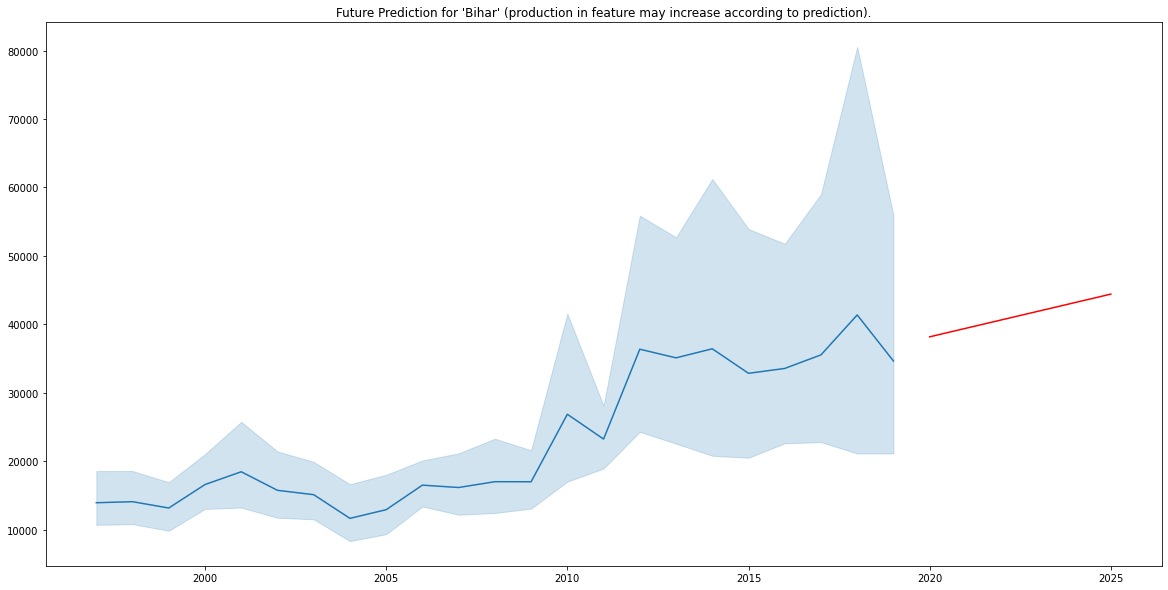

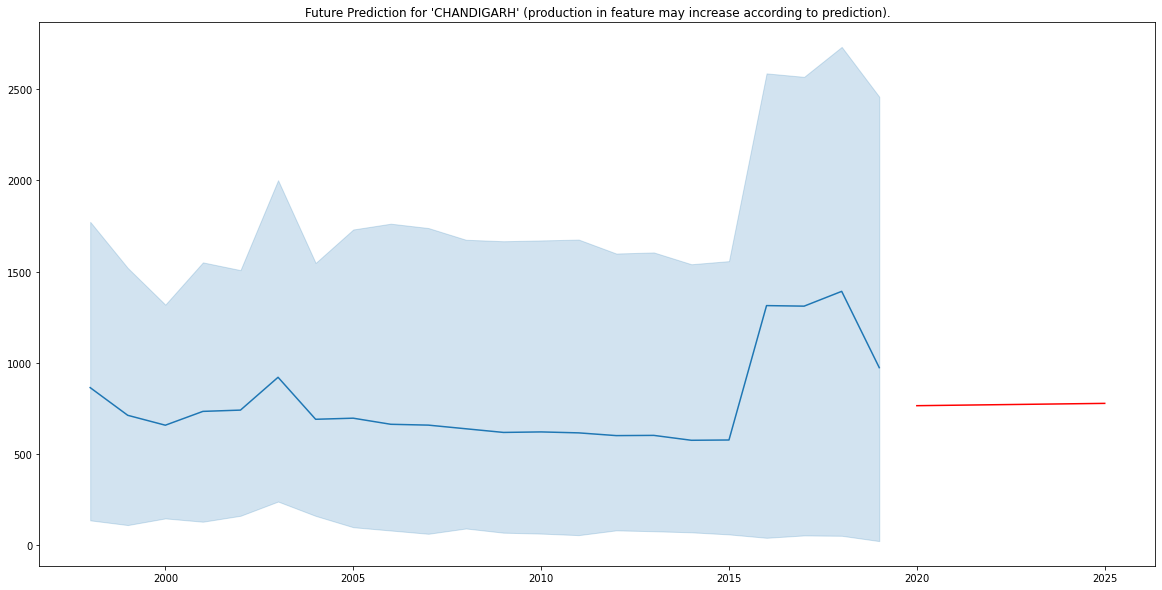

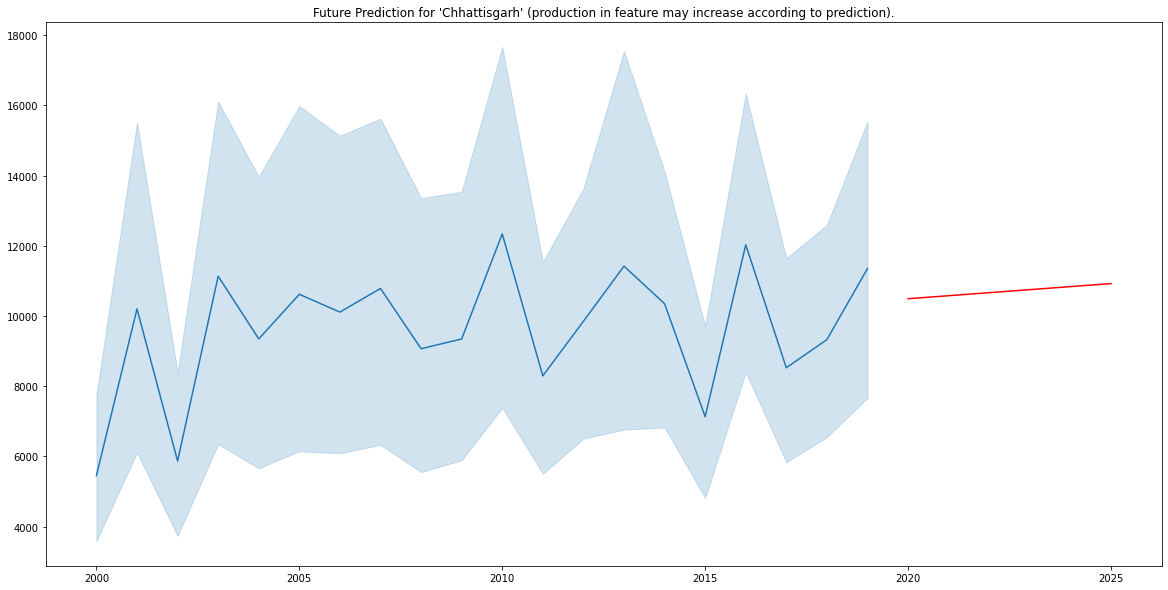

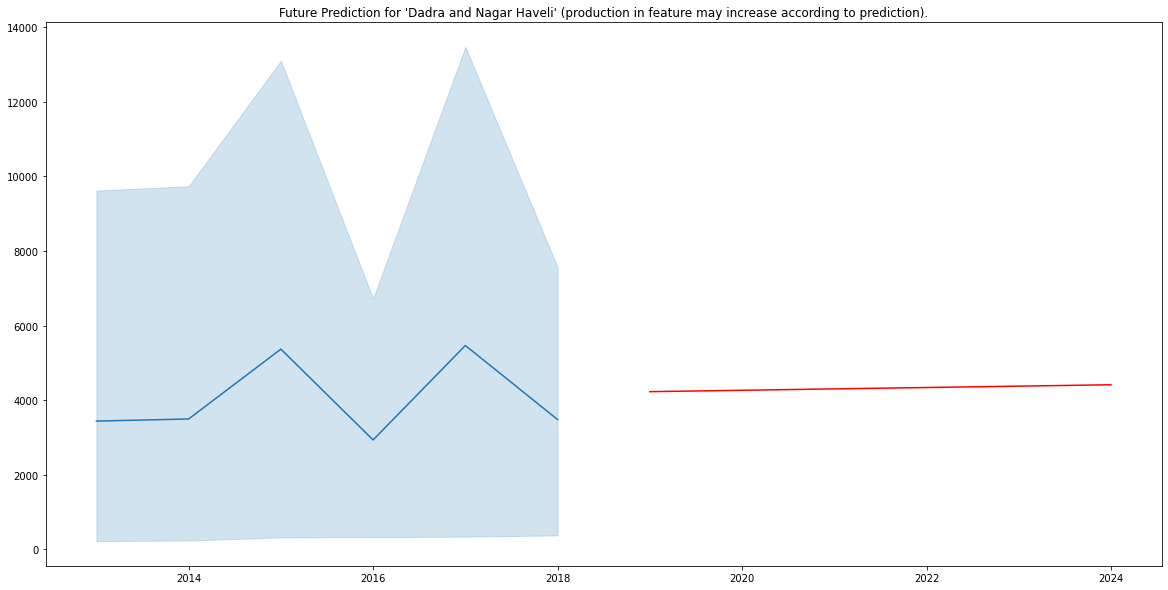

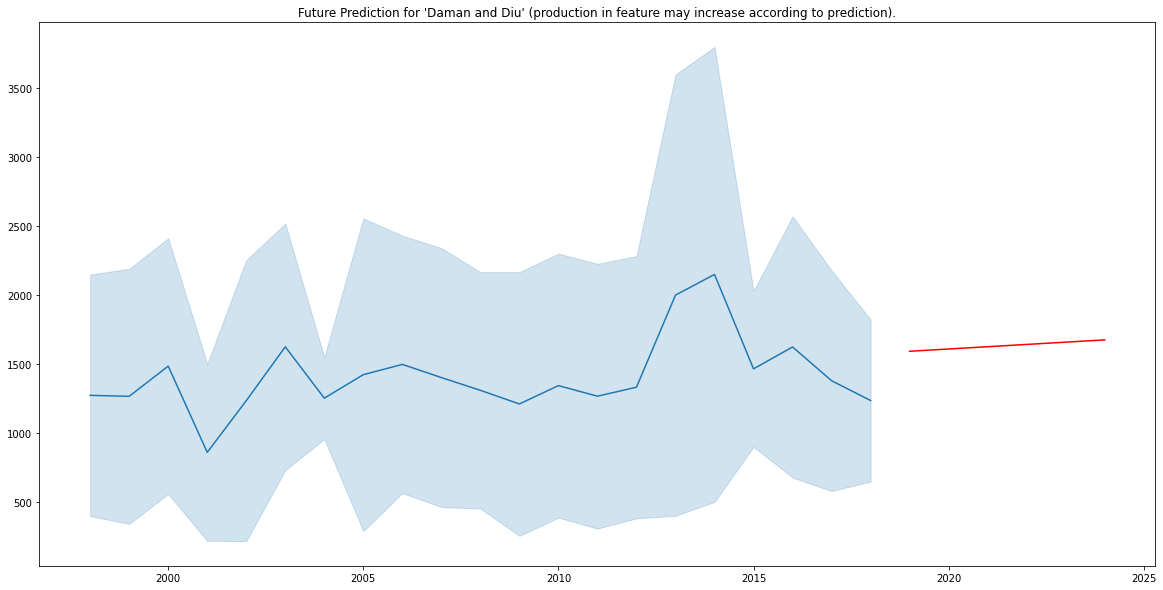

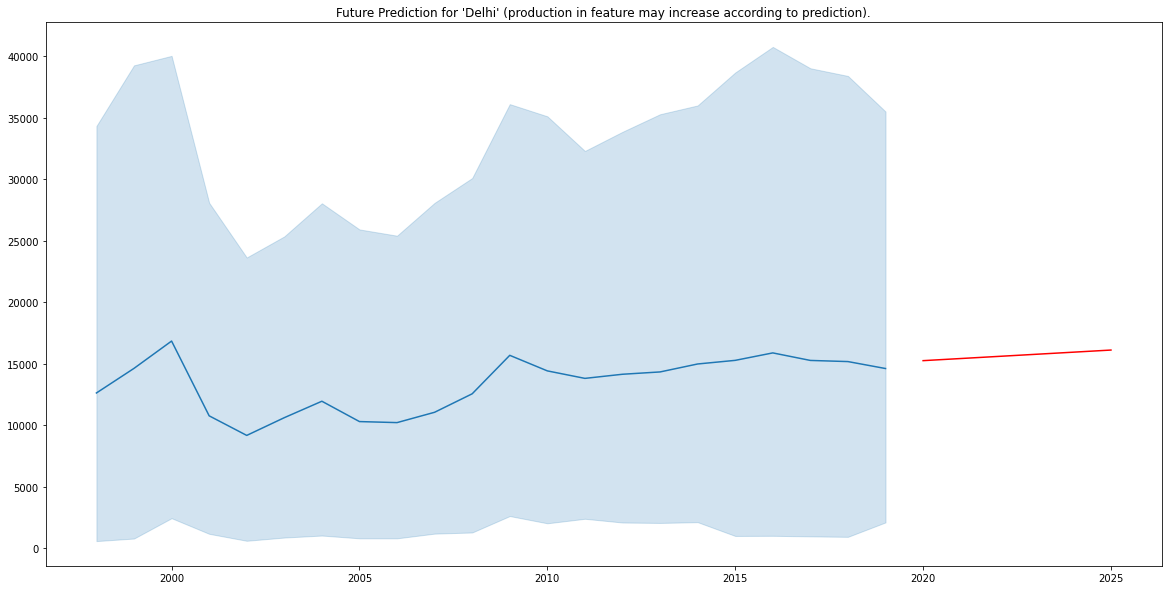

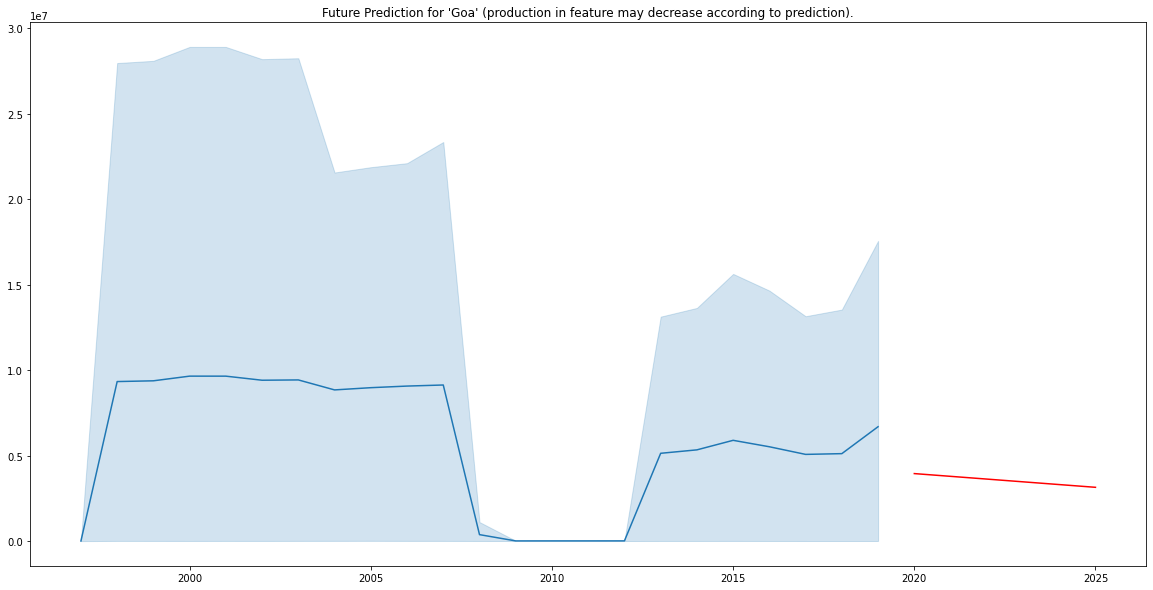

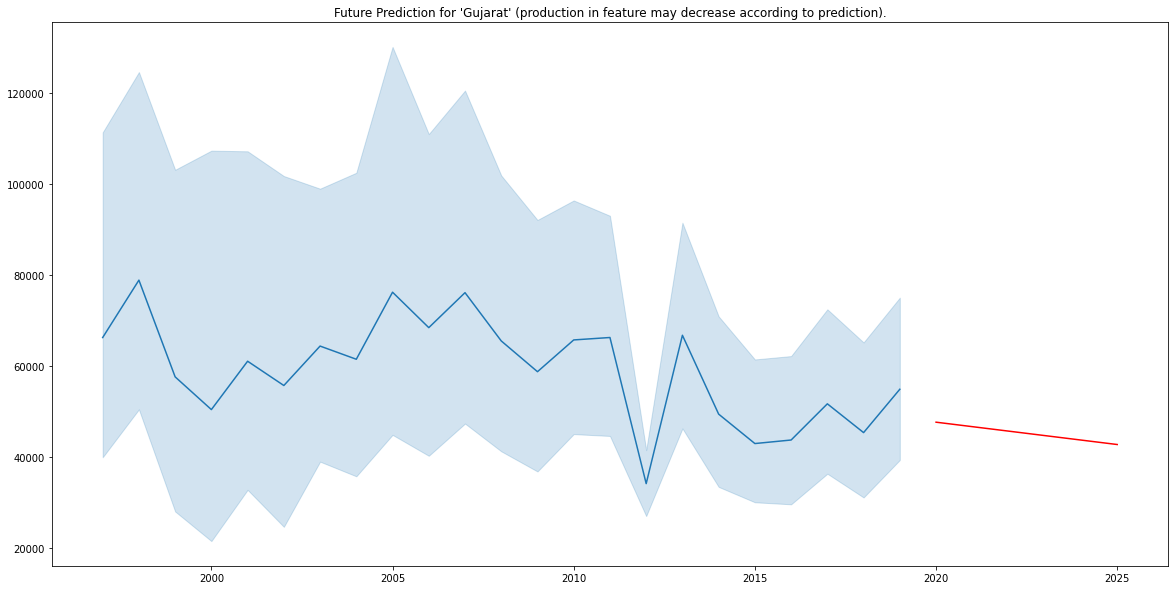

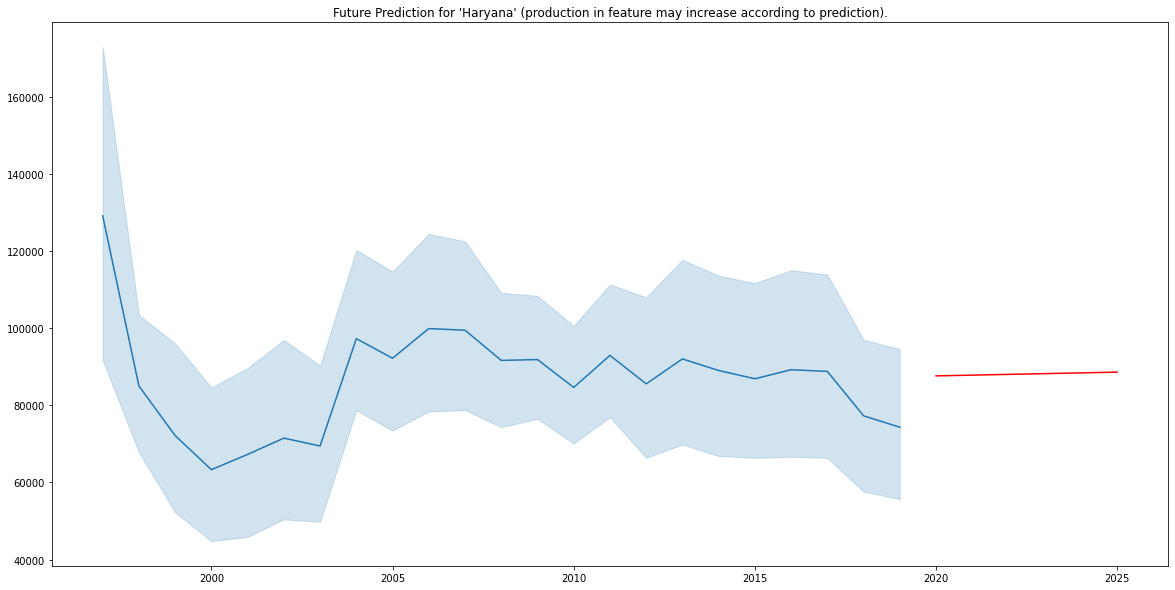

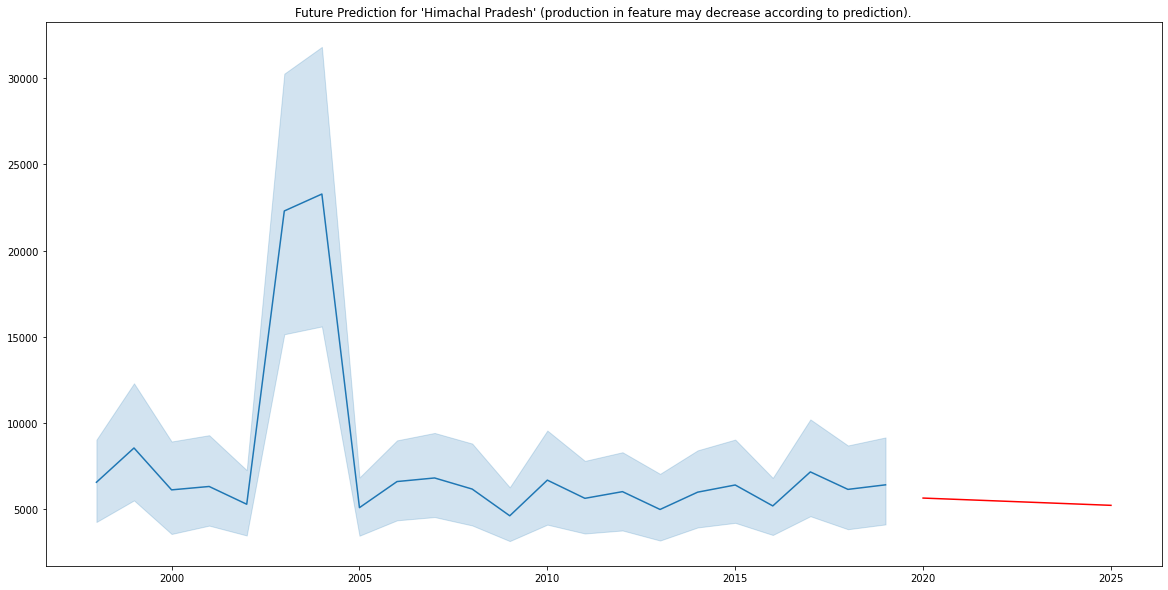

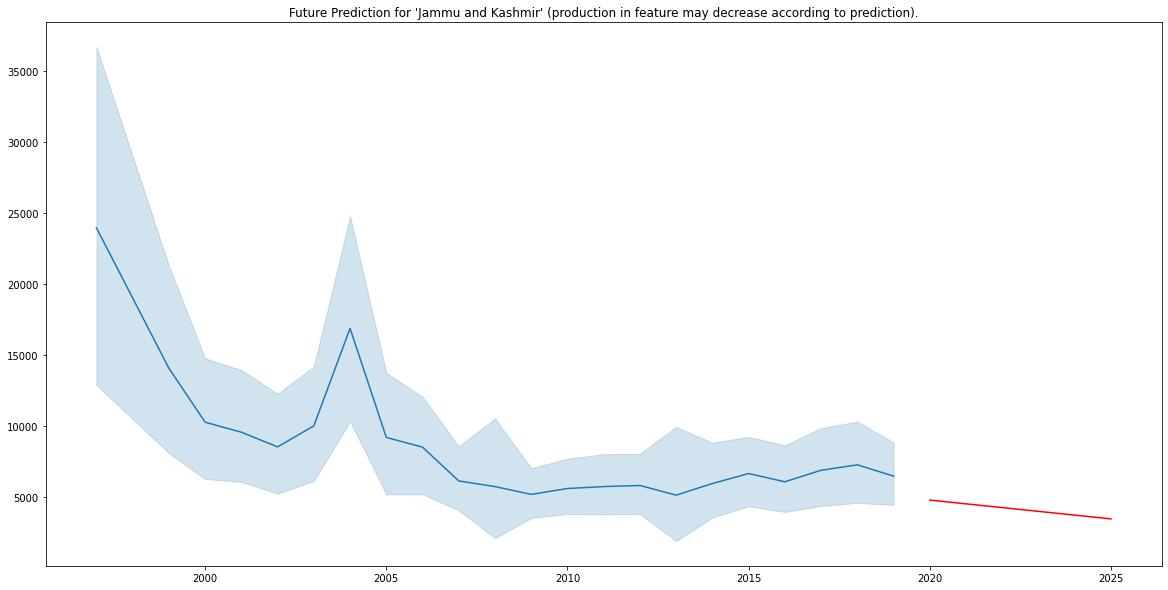

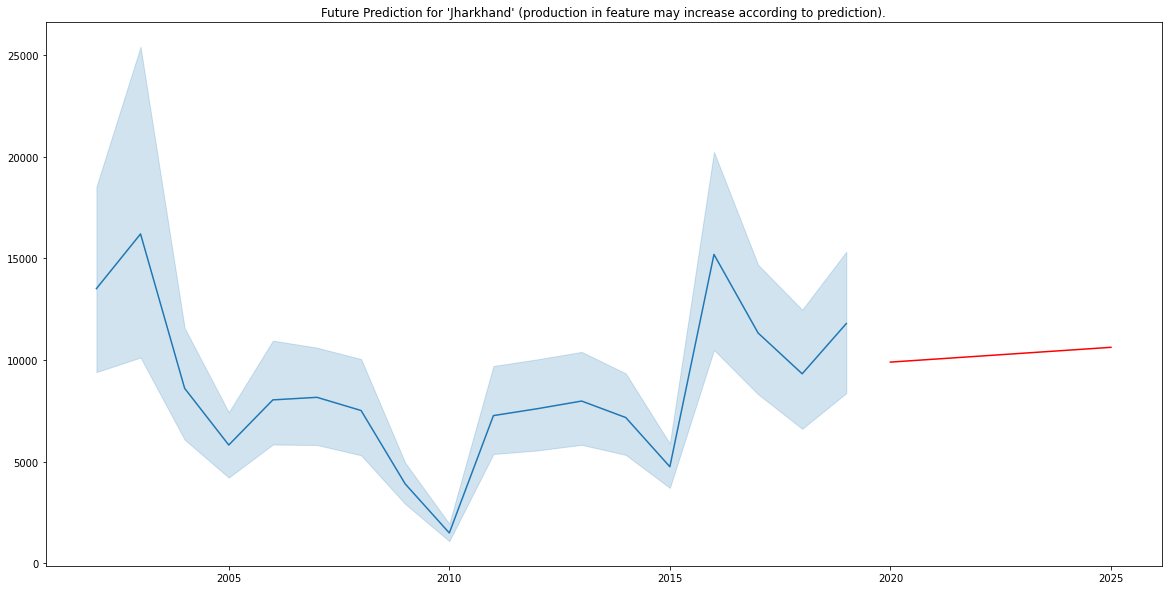

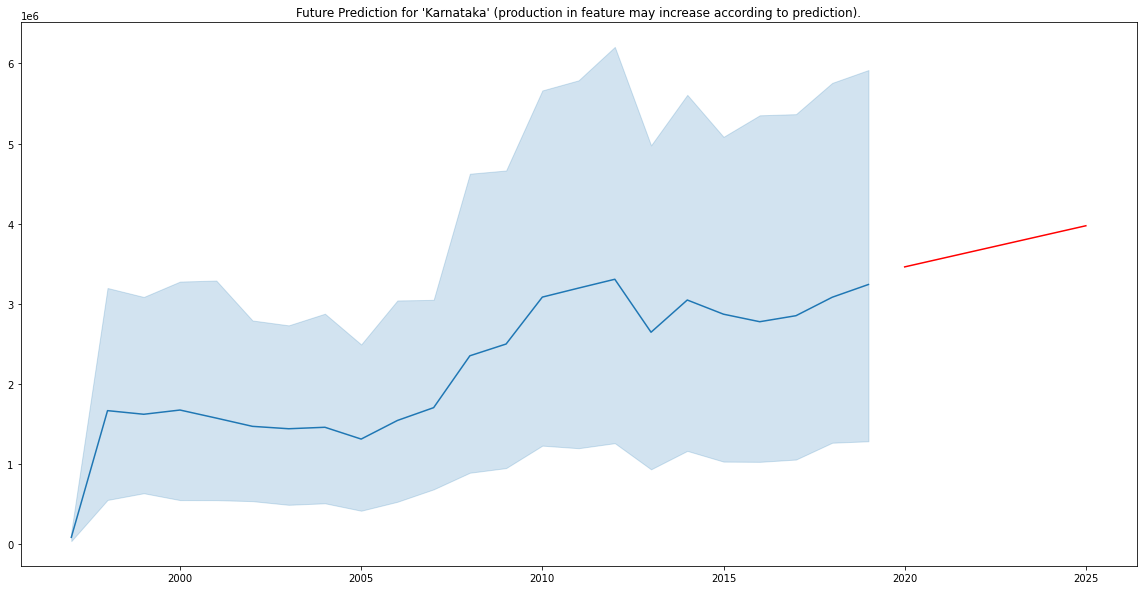

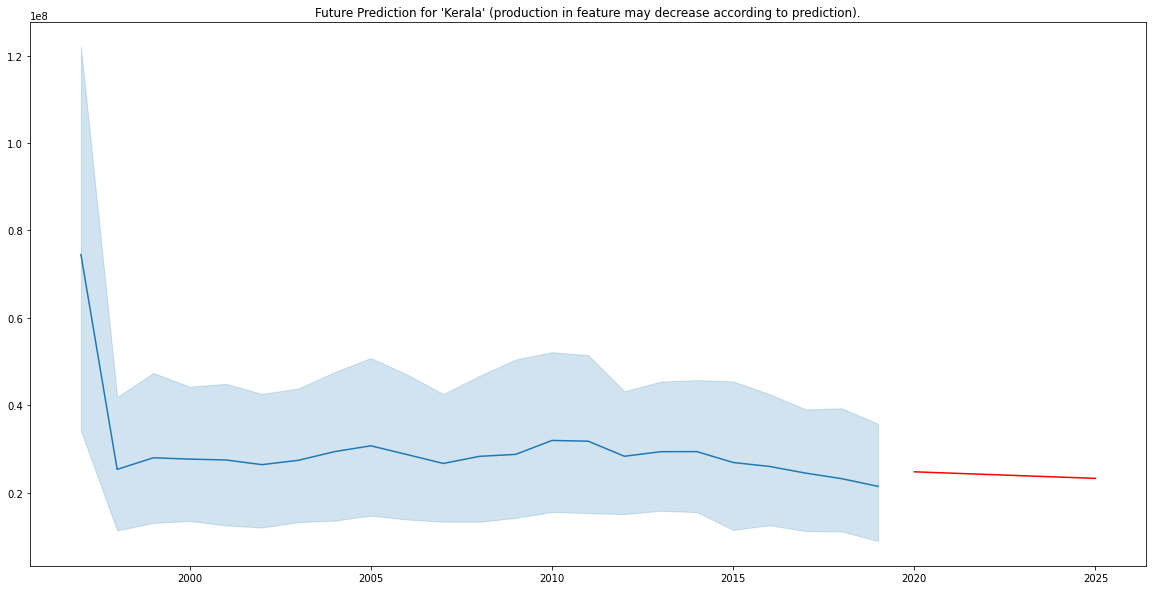

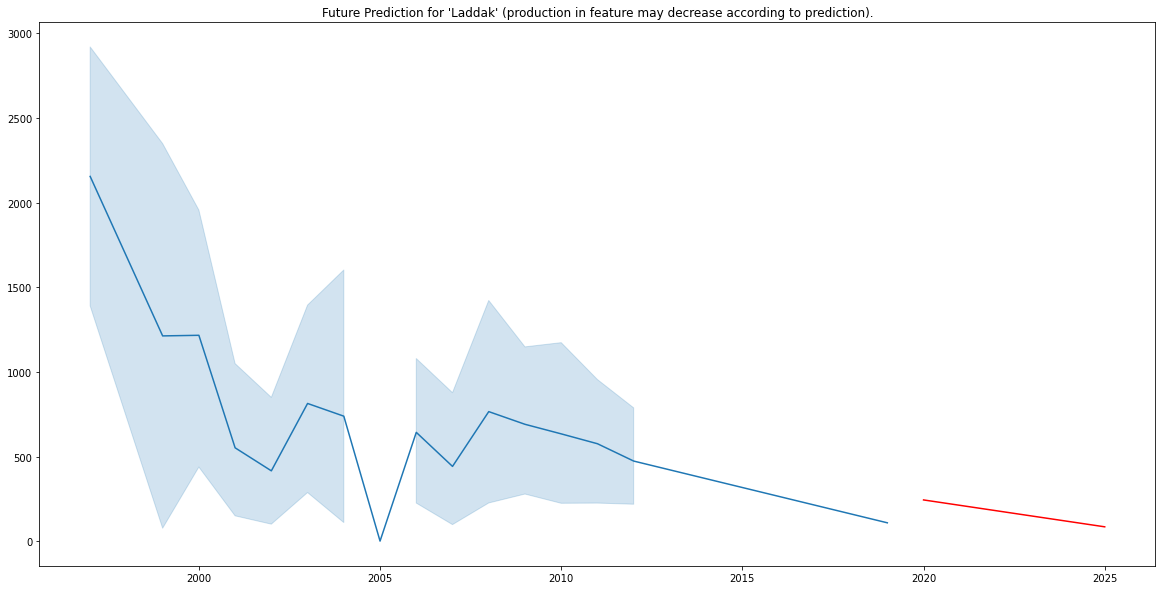

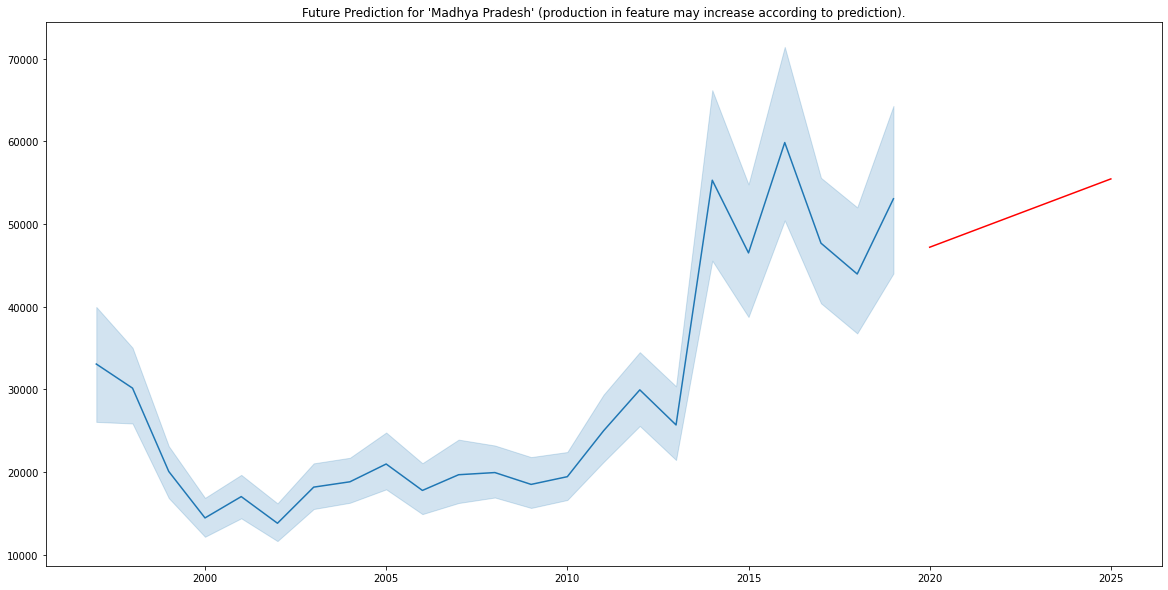

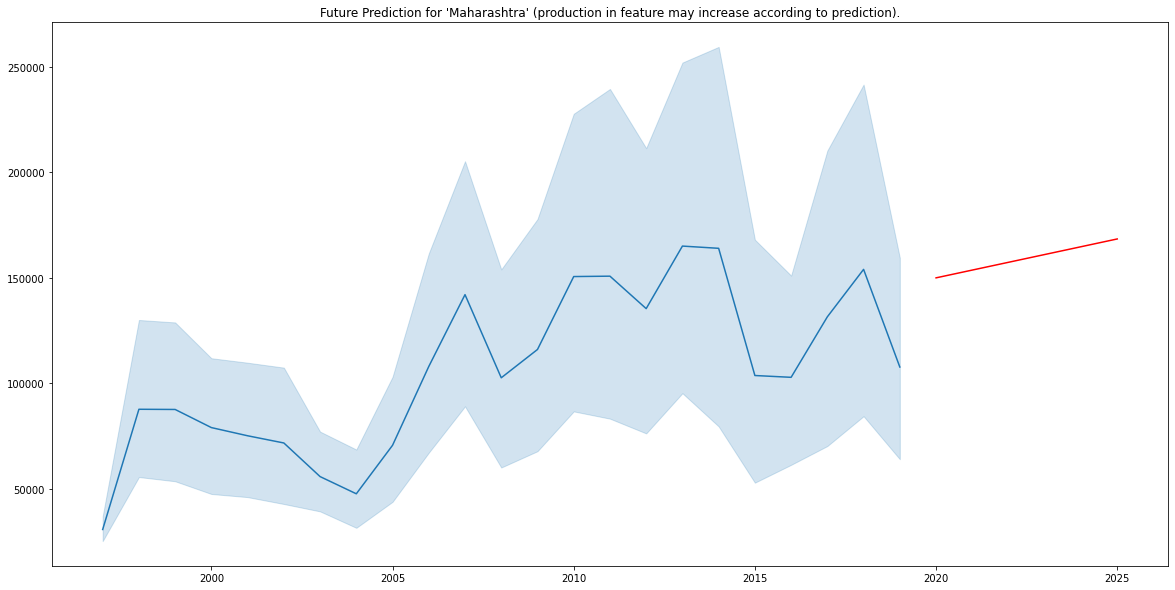

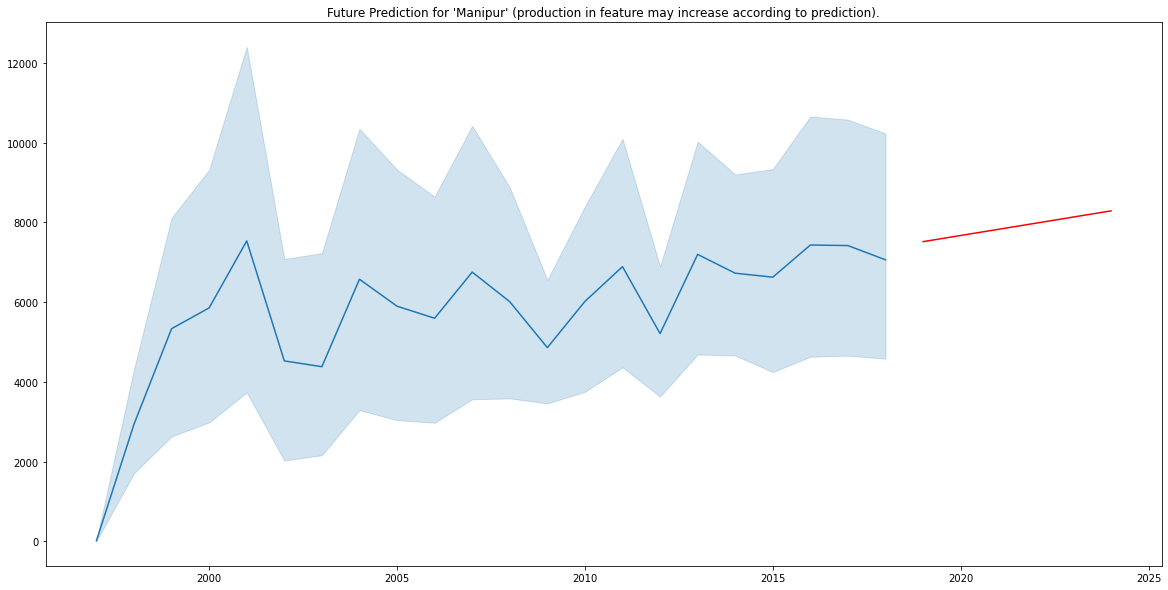

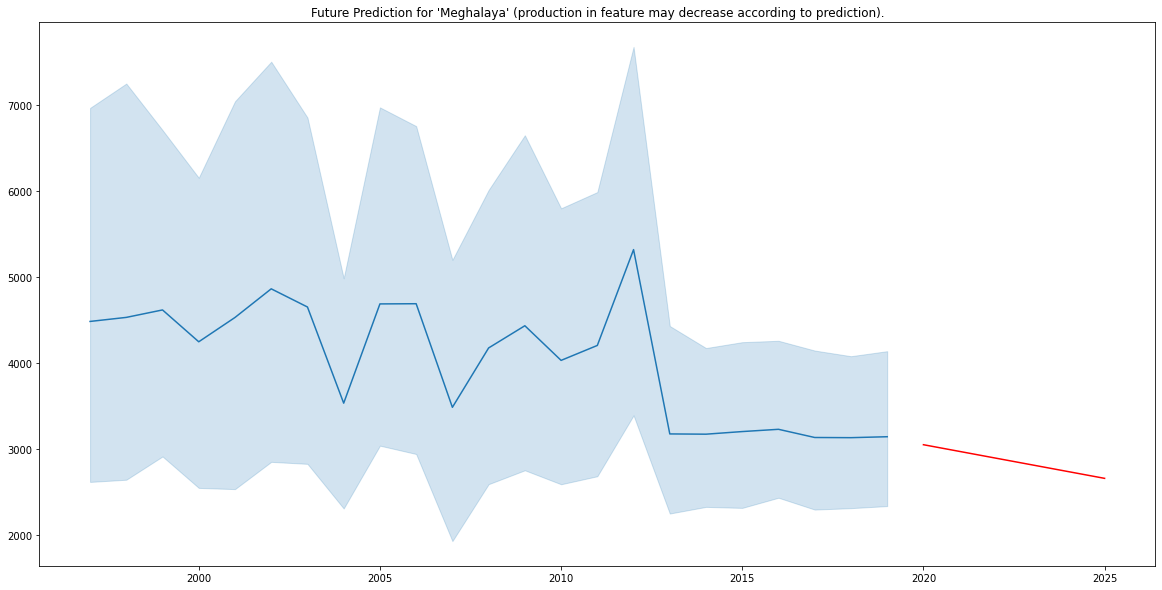

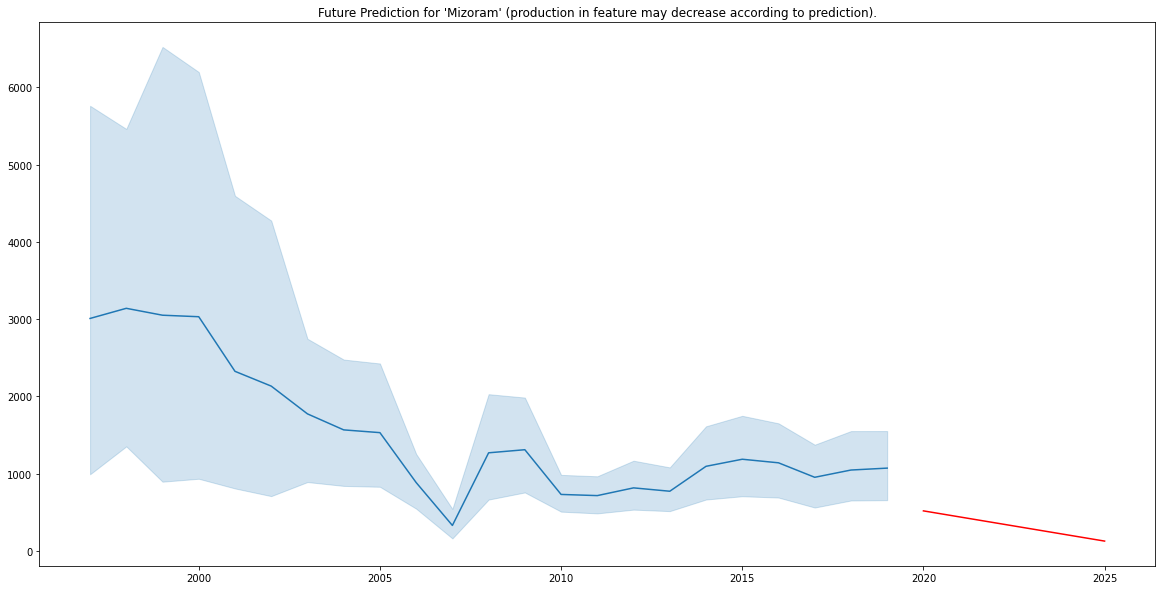

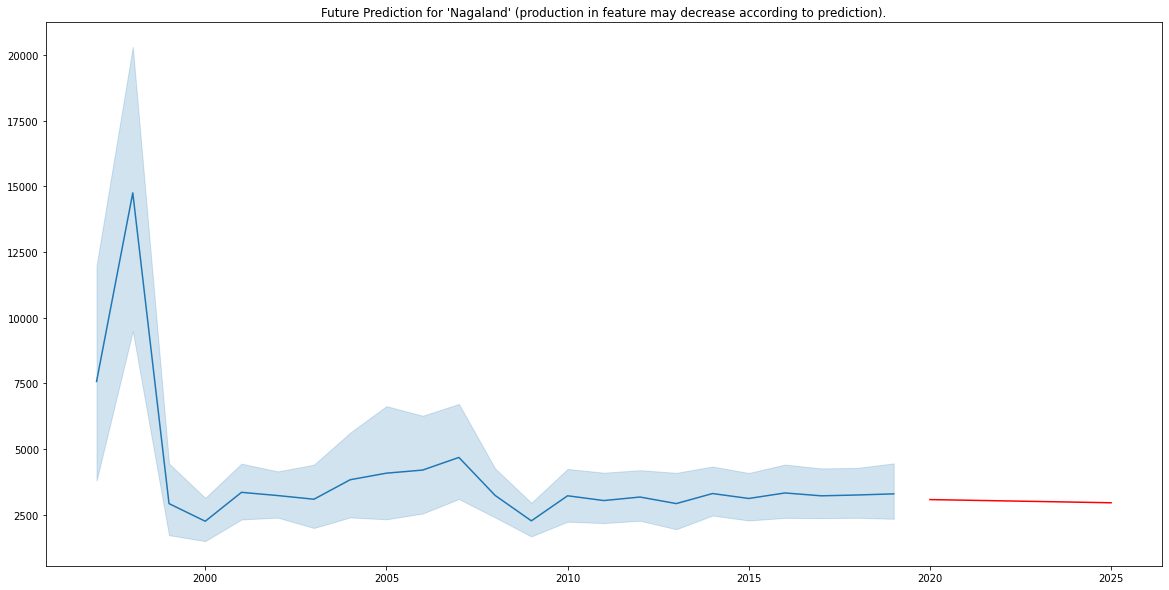

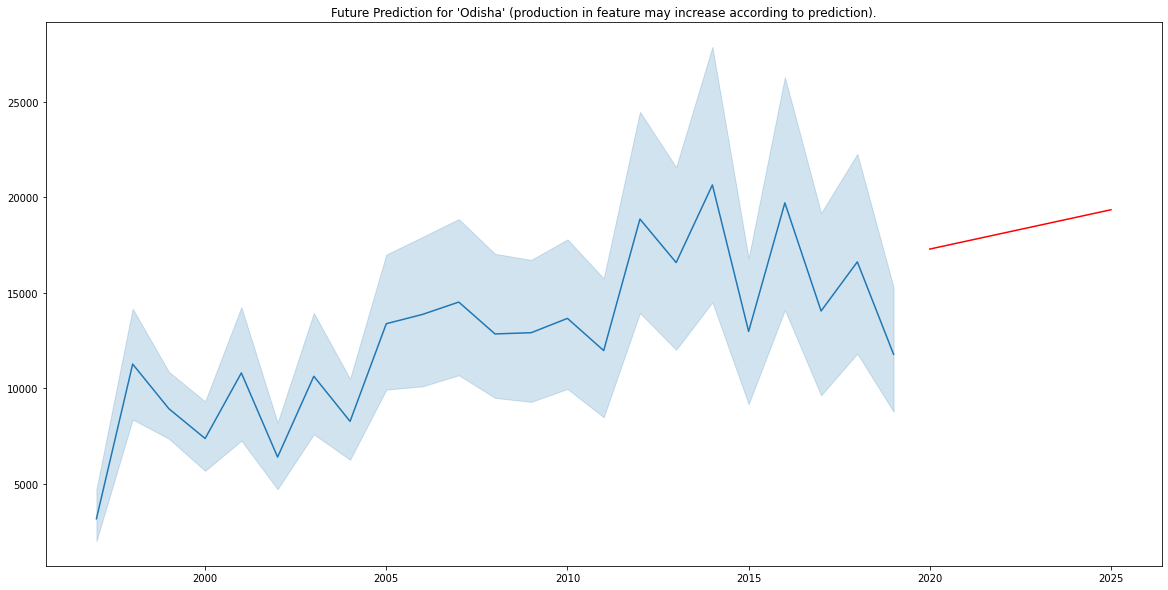

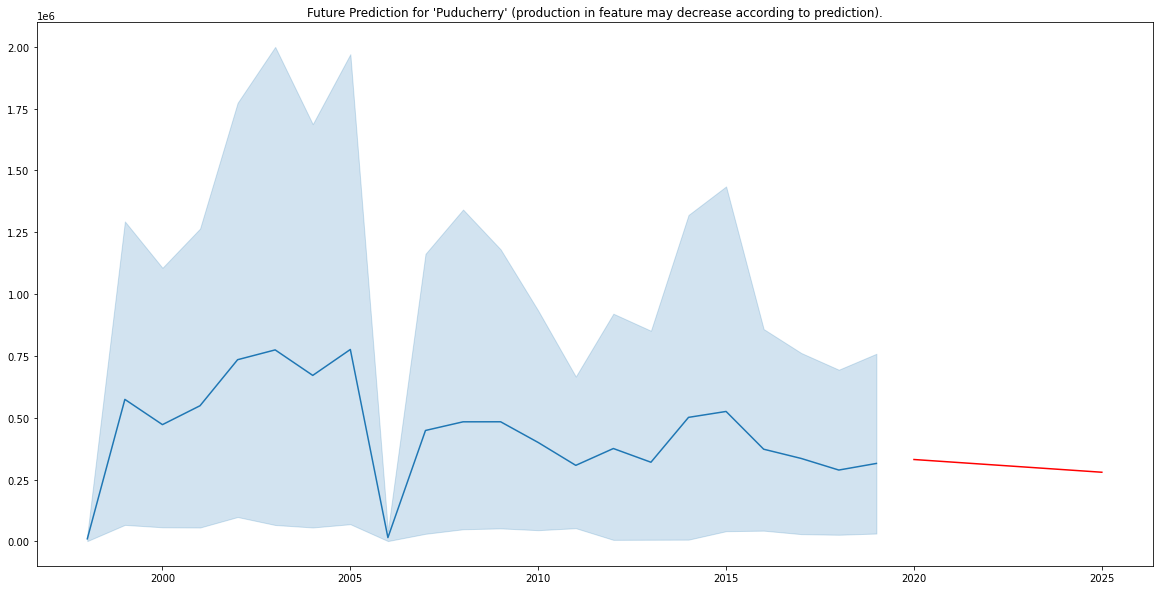

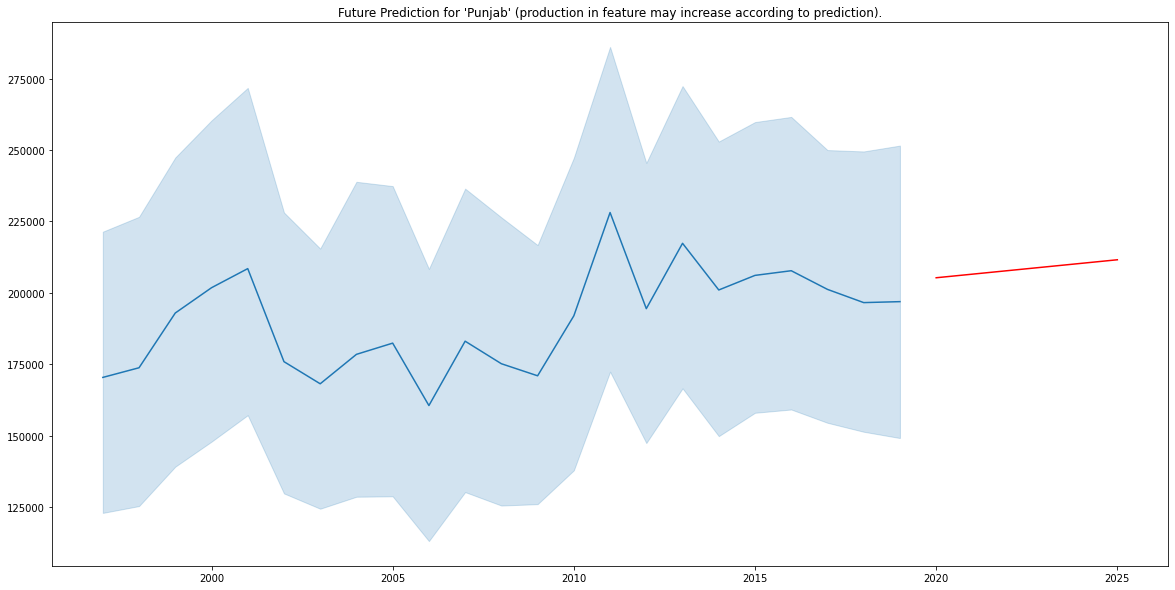

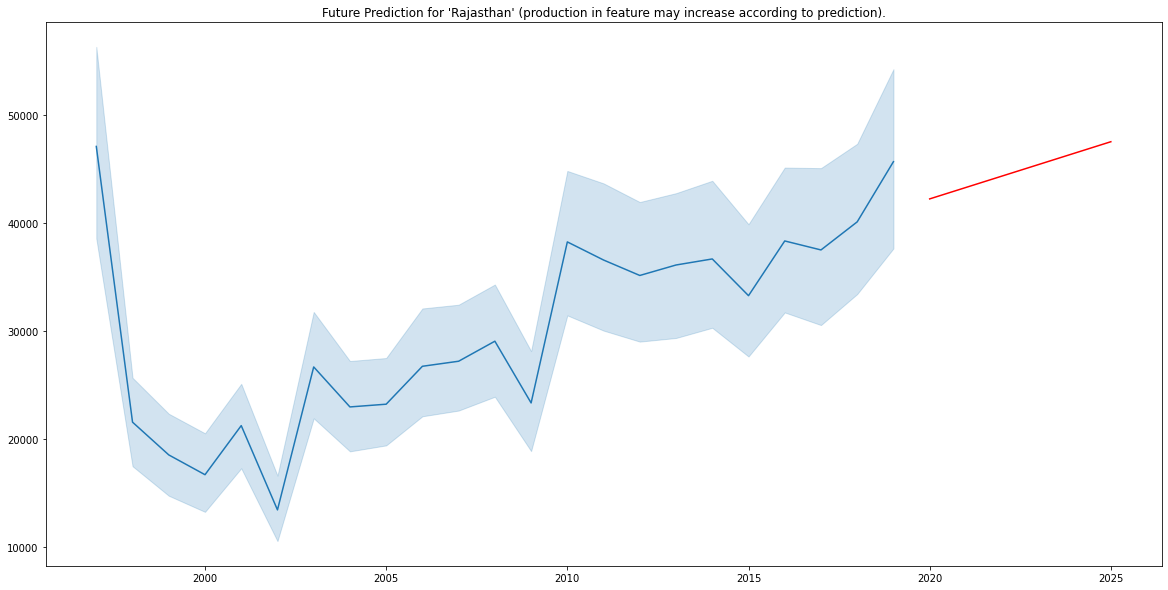

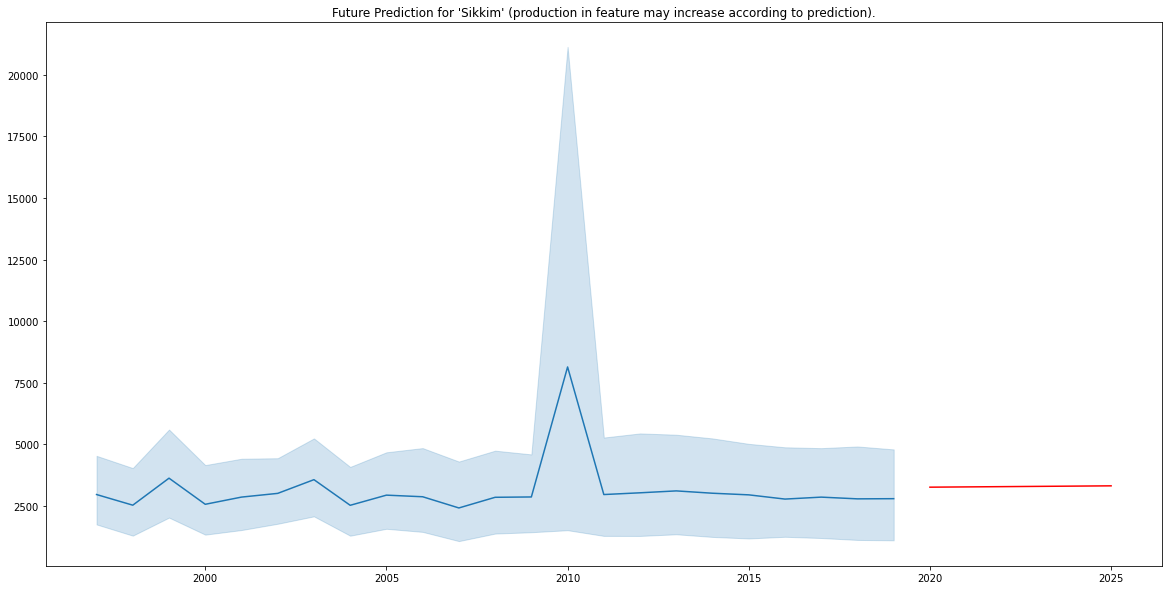

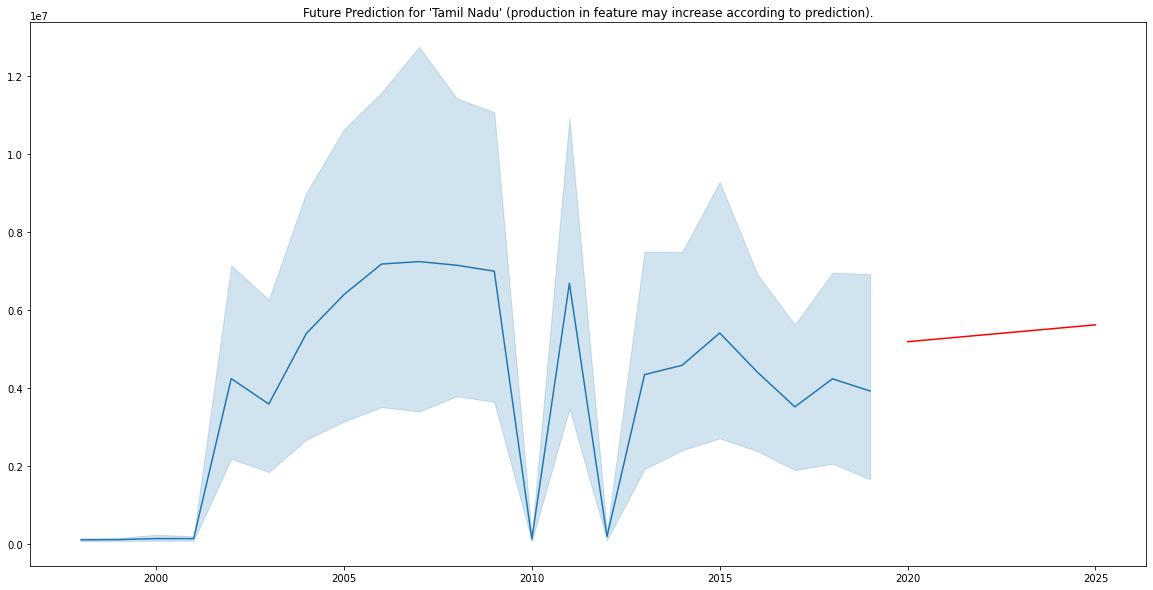

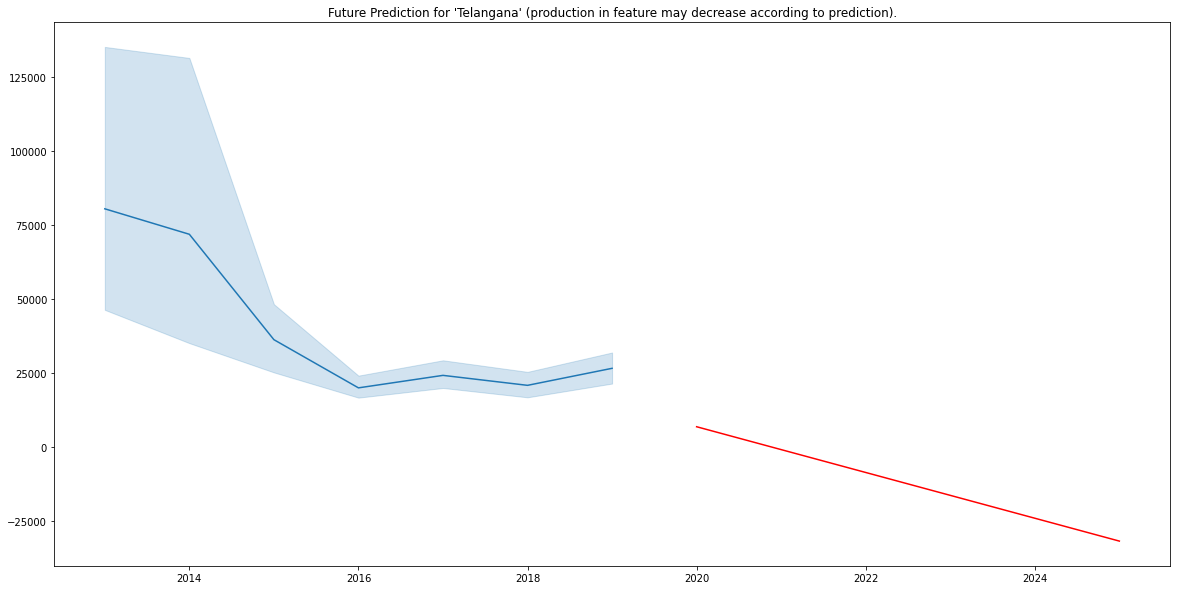

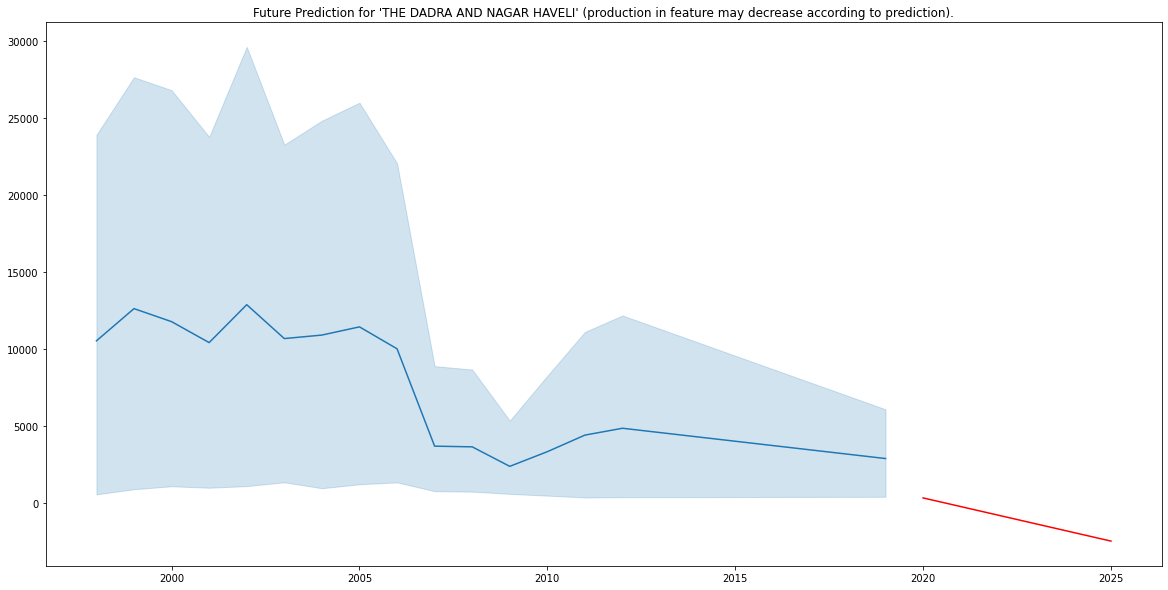

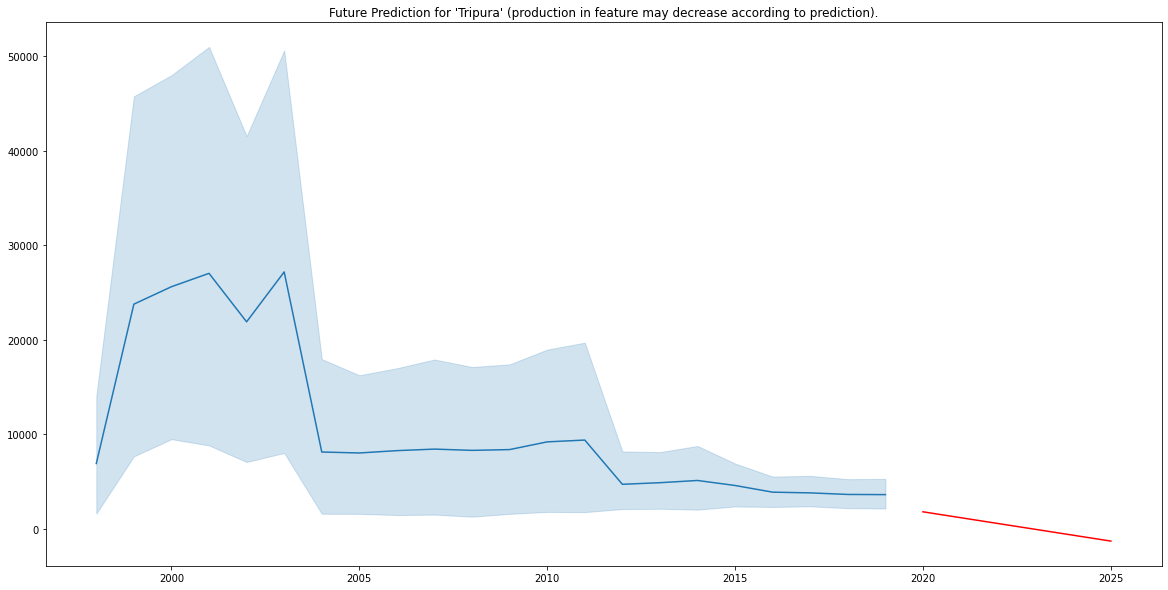

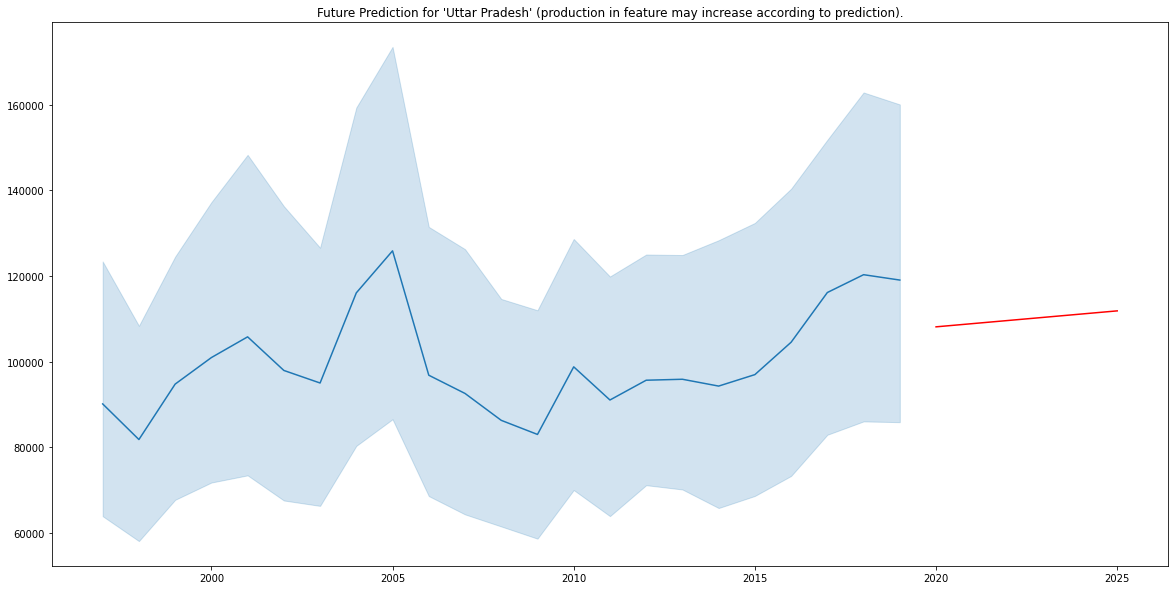

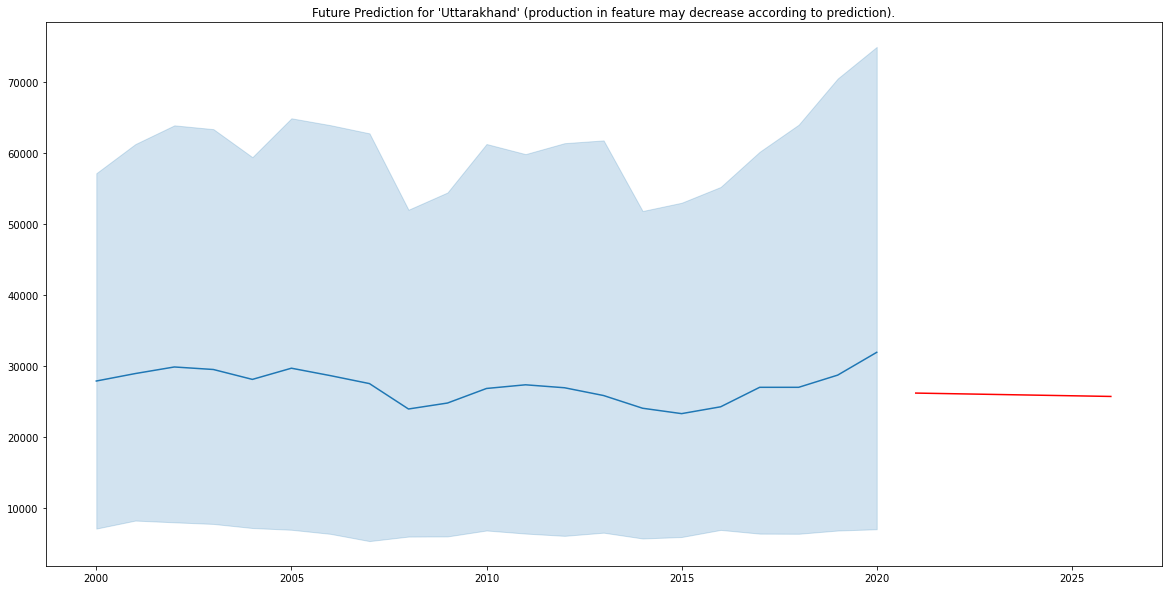

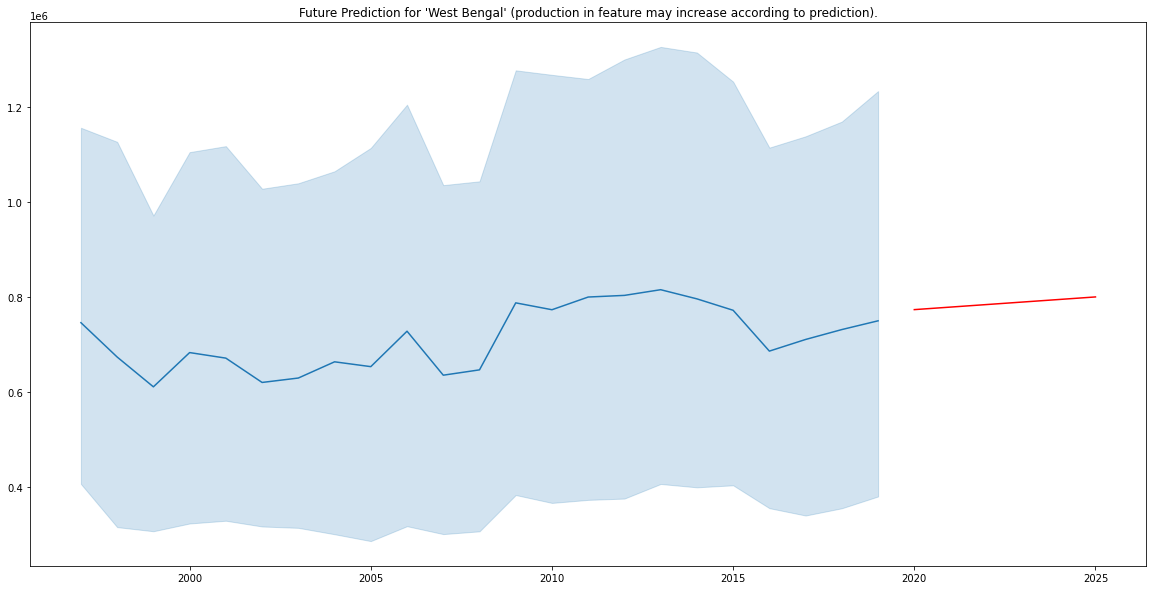

In [27]:
def predict_future_production():
  for state in df["State"].unique():
    X_values = np.expand_dims(df.sort_values(by=["Crop_Year"])["Crop_Year"][df["State"] == state].values, axis=1)
    y_values = df.sort_values(by=["Crop_Year"])["Production"][df["State"] == state].values
    years_for_prediction = []
    high_year = np.max(X_values)
    for i in range(0, 6):
      high_year = high_year + 1
      years_for_prediction.append(high_year)
    
    years_for_prediction = np.array(years_for_prediction)

    # sc = MinMaxScaler()
    # X_values_scaled = sc.fit_transform(X_values)
    # y_values_scaled = sc.fit_transform(np.expand_dims(y_values, axis=1))
    
    lr = LinearRegression()
    # lr.fit(X_values_scaled, y_values_scaled)
    lr.fit(X_values, y_values)

    # years_for_prediction_scaled = sc.transform(np.expand_dims(years_for_prediction, axis=1))
    # predicted_values = lr.predict(years_for_prediction_scaled)

    predicted_values = lr.predict(np.expand_dims(years_for_prediction, axis=1))
    plt.figure(figsize=(20, 10))
    # predicted_values = sc.inverse_transform(predicted_values)
    # predicted_values = predicted_values.reshape(1, -1)[0]
    sns.lineplot(df.sort_values(by=["Crop_Year"])["Crop_Year"][df["State"] == state].values, y_values)
    sns.lineplot(years_for_prediction, predicted_values, color="red")
    if predicted_values[0] > predicted_values[-1]:
      plt.title(f"Future Prediction for '{state}' (production in feature may decrease according to prediction).")
    else:
      plt.title(f"Future Prediction for '{state}' (production in feature may increase according to prediction).")
    plt.show()

predict_future_production()

## Conclusion

From Above Exploration, we can gain some knowledge of production of crops in India.

**Please Star My Repo https://github.com/DJDarkCyber/ML-DL-Projects Thanks ❤**